# Predicting Late Deliveries : A Detailed Business Problem

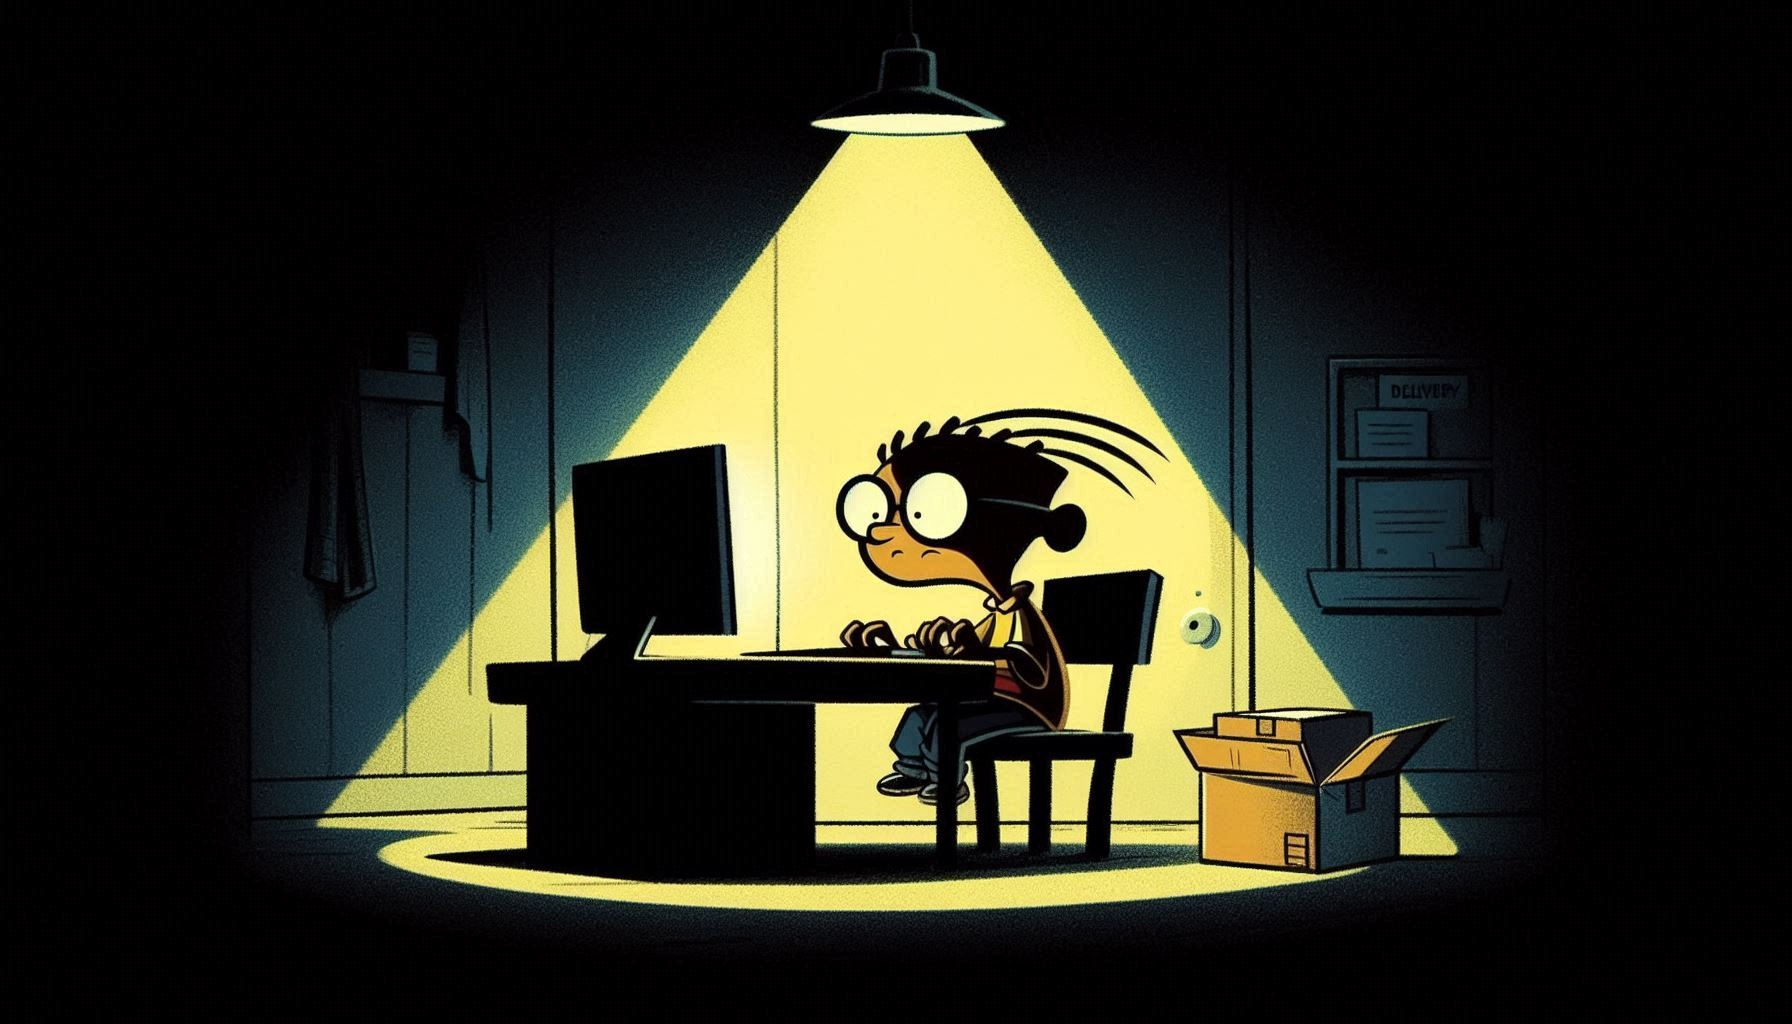

### **Problem Statement:**

In the competitive e-commerce industry, timely delivery is crucial for maintaining customer satisfaction and brand reputation. Late deliveries not only frustrate customers but also lead to increased costs due to expedited shipping and potential compensation.


This dataset offers a comprehensive view of various factors influencing delivery times, such as order details, customer demographics, and shipping information.We wil be focusing on Puerto Rico for today. By predicting which shipping days, businesses can take proactive measures to ensure timely fulfillment, optimize resource allocation, and enhance overall customer experience.

#### Business Objective

Develop a predictive model that returns real shipping days to allow optimization of delivery days this will allow identification of orders likely to experience delays before they occur. This model will allow the logistics team to prioritize and intervene on high-risk shipments, adjust delivery schedules, and manage customer expectations more effectively.




**Libraries used :**
1. pandas
2. statsmodels
3. numpy
4. matplotlib
5. scikit learn
6. XGboost
7. skopt
8. category_encoders
9. shap

#### **Implementation Steps:**

1. **Data Preparation:**

- Cleaning and preprocessing the data, sorting out any missing values, outliers, or inconsistencies.
- Feature engineering to create new variables that could enhance model performance, such as calculating the number of orders shipped and number of orders made on a particular day as traffic.


1. **Exploratory Data Analysis (EDA):**

- Conduct an in-depth analysis to understand the distribution of delivery times and the correlation between variables.
- Identify key predictors of late deliveries.


3. **Model Development:**

- Train and test various machine learning models (e.g., logistic regression, random forests, gradient boosting) to predict the likelihood of late deliveries.
- Evaluate model performance using metrics such as precision, recall, and the F1 score.

#### Import libraries

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

#### Load dataset

In [2]:
# Import pandas to work with the DataFrame
import pandas as pd

# Read the dataset from the CSV file. 
# 'Unnamed: 0' column is set as the index .
df = pd.read_csv('Dataset/dataset.csv', index_col='Unnamed: 0')

# Display the first 20 rows of the DataFrame to check the data content and structure.
df.head(20)


Type  Days_for_shipping_(real)  Days_for_shipment_(scheduled)  \
0      DEBIT                         3                              4   
1   TRANSFER                         5                              4   
2       CASH                         4                              4   
3      DEBIT                         3                              4   
4    PAYMENT                         2                              4   
5   TRANSFER                         6                              4   
6      DEBIT                         2                              1   
7   TRANSFER                         2                              1   
8       CASH                         3                              2   
9       CASH                         2                              1   
10  TRANSFER                         6                              2   
11  TRANSFER                         5                              2   
12  TRANSFER                         4                              2   
13     DEBIT                         2                              1   
14  TRANSFER                         2                              1   
15     DEBIT                         2                              1   
16   PAYMENT                         5                              2   
17      CASH                         2                              1   
18     DEBIT                         2                              1   
19   PAYMENT                         0                              0   

    Benefit_per_order  Sales_per_customer    Delivery_Status  \
0            91.25000           314.64001   Advance shipping   
1          -249.09000           311.35999      Late delivery   
2          -247.78000           309.72000   Shipping on time   
3            22.86000           304.81000   Advance shipping   
4           134.21001           298.25000   Advance shipping   
5            18.58000           294.98001  Shipping canceled   
6            95.18000           288.42001      Late delivery   
7            68.43000           285.14001      Late delivery   
8           133.72000           278.59000      Late delivery   
9           132.14999           275.31000      Late delivery   
10          130.58000           272.03000  Shipping canceled   
11           45.69000           268.76001      Late delivery   
12           21.76000           262.20001      Late delivery   
13           24.58000           245.81000      Late delivery   
14           16.39000           327.75000      Late delivery   
15         -259.57999           324.47000      Late delivery   
16         -246.36000           321.20001      Late delivery   
17           23.84000           317.92001      Late delivery   
18          102.26000           314.64001      Late delivery   
19           87.18000           311.35999   Shipping on time   

    Late_delivery_risk  Category_Id   Category_Name   Customer_City  ...  \
0                    0           73  Sporting Goods          Caguas  ...   
1                    1           73  Sporting Goods          Caguas  ...   
2                    0           73  Sporting Goods        San Jose  ...   
3                    0           73  Sporting Goods     Los Angeles  ...   
4                    0           73  Sporting Goods          Caguas  ...   
5                    0           73  Sporting Goods       Tonawanda  ...   
6                    1           73  Sporting Goods          Caguas  ...   
7                    1           73  Sporting Goods           Miami  ...   
8                    1           73  Sporting Goods          Caguas  ...   
9                    1           73  Sporting Goods       San Ramon  ...   
10                   0           73  Sporting Goods          Caguas  ...   
11                   1           73  Sporting Goods        Freeport  ...   
12                   1           73  Sporting Goods         Salinas  ...   
13                   1           73  Sporting Goods          Cagu

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123595 entries, 0 to 123594
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           123595 non-null  object 
 1   Days_for_shipping_(real)       123595 non-null  int64  
 2   Days_for_shipment_(scheduled)  123595 non-null  int64  
 3   Benefit_per_order              123595 non-null  float64
 4   Sales_per_customer             123595 non-null  float64
 5   Delivery_Status                123595 non-null  object 
 6   Late_delivery_risk             123595 non-null  int64  
 7   Category_Id                    123595 non-null  int64  
 8   Category_Name                  123595 non-null  object 
 9   Customer_City                  123595 non-null  object 
 10  Customer_Country               123595 non-null  object 
 11  Customer_Email                 123595 non-null  object 
 12  Customer_Fname                 1235

In [4]:
# This will generate descriptive statistics for all numeric columns in the dataframe
df.describe()

Days_for_shipping_(real)  Days_for_shipment_(scheduled)  \
count             123595.000000                  123595.000000   
mean                   3.479032                       2.864978   
std                    1.624559                       1.381694   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   

       Benefit_per_order  Sales_per_customer  Late_delivery_risk  \
count      123595.000000       123595.000000       123595.000000   
mean           21.090146          175.096074            0.564287   
std           100.832643          116.884299            0.495852   
min         -4274.979980            7.490000            0.000000   
25%             6.720000          103.990000            0.000000   
50%            30.670000          161.970000            1.000000   
75%            62.390000          227.960010            1.000000   
max           864.000000         1919.989990            1.000000   

         Category_Id    Customer_Id  Customer_Zipcode  Department_Id  \
count  123595.000000  123595.000000     123592.000000  123595.000000   
mean       31.824572    6706.230438      39913.130882       5.415413   
std        15.862559    4203.202333      37583.720377       1.636375   
min         2.000000       1.000000        603.000000       2.000000   
25%        18.000000    3244.000000        725.000000       4.000000   
50%        29.000000    6453.000000      30066.000000       5.000000   
75%        46.000000    9819.000000      80126.000000       7.000000   
max        76.000000   20757.000000      99205.000000      12.000000   

            Latitude  ...  Order_Item_Quantity          Sales  \
count  123595.000000  ...        123595.000000  123595.000000   
mean       30.982568  ...             2.121243     194.866545   
std         9.513307  ...             1.474254     128.800632   
min       -33.937550  ...             1.000000       9.990000   
25%        18.282110  ...             1.000000     119.980000   
50%        33.891650  ...             1.000000     199.920000   
75%        39.837920  ...             3.000000     250.000000   
max        48.781930  ...             5.000000    1999.989990   

       Order_Item_Total  Order_Profit_Per_Order  Order_Zipcode  \
count     123595.000000           123595.000000   16521.000000   
mean         175.096074               21.090146   55426.449912   
std          116.884299              100.832643   31991.430193   
min            7.490000            -4274.980000    1040.000000   
25%          103.990000                6.720000   23320.000000   
50%          161.970000               30.670000   59405.000000   
75%          227.960010               62.390000   90008.000000   
max         1919.989990              864.000000   99301.000000   

       Product_Card_Id  Product_Category_Id  Product_Description  \
count    123595.000000        123595.000000                  0.0   
mean        691.377928            31.824572                  NaN   
std         340.186158            15.862559                  NaN   
min          19.000000             2.000000                  NaN   
25%         403.000000            18.000000                  NaN   
50%         627.000000            29.000000                  NaN   
75%        1014.000000            46.000000                  NaN   
max        1363.000000            76.000000                  NaN   

       Product_Price  Product_Status  
count  123595.000000        123595.0  
mean      132.954527             0.0  
std       131.371339             0.0  
min         9.990000             0.0  
25%        50.000000             0.0  
50%        84.400000             0.0  
75%       199.990000             0.0  
max      1999.990000             0.0  

[8 r

In [5]:
# dropping duplicate records

df.drop_duplicates(inplace=True)

In [6]:
# Show columns
df.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)',
       'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status',
       'Late_delivery_risk', 'Category_Id', 'Category_Name', 'Customer_City',
       'Customer_Country', 'Customer_Email', 'Customer_Fname', 'Customer_Id',
       'Customer_Lname', 'Customer_Password', 'Customer_Segment',
       'Customer_State', 'Customer_Street', 'Customer_Zipcode',
       'Department_Id', 'Department_Name', 'Latitude', 'Longitude', 'Market',
       'Order_City', 'Order_Country', 'Order_Customer_Id',
       'order_date_(DateOrders)', 'Order_Id', 'Order_Item_Cardprod_Id',
       'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Order_Item_Id',
       'Order_Item_Product_Price', 'Order_Item_Profit_Ratio',
       'Order_Item_Quantity', 'Sales', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Order_Region', 'Order_State', 'Order_Status',
       'Order_Zipcode', 'Product_Card_Id', 'Product_Category_Id',
       'Product_De

In [7]:
# Loop through each column in the dataframe
for x in df.columns:
    # Print the count of each unique value in the current column
    print(df[x].value_counts())

Type
DEBIT       51403
TRANSFER    29275
PAYMENT     28909
CASH        14008
Name: count, dtype: int64
Days_for_shipping_(real)
2    39405
4    19487
3    19451
6    19449
5    18966
0     3481
1     3356
Name: count, dtype: int64
Days_for_shipment_(scheduled)
4    70276
2    26511
1    19971
0     6837
Name: count, dtype: int64
Benefit_per_order
 0.00      794
 72.00     173
 46.80     150
 63.70     139
 62.40     132
          ... 
-117.80      1
-166.13      1
-149.56      1
 337.50      1
 53.14       1
Name: count, Length: 19424, dtype: int64
Sales_per_customer
149.99001    954
107.89000    924
106.59000    923
126.09000    922
122.84000    914
            ... 
23.79000       1
77.40000       1
26.22000       1
929.98999      1
909.98999      1
Name: count, Length: 2843, dtype: int64
Delivery_Status
Late delivery        69743
Advance shipping     27295
Shipping on time     22036
Shipping canceled     4521
Name: count, dtype: int64
Late_delivery_risk
1    69743
0    53852
Name: co

##### Breakdown of data contained in df



| **Column Name**                | **Description**                                                                                  |
|--------------------------------|--------------------------------------------------------------------------------------------------|
| `Type`                          | The type of transaction (e.g., DEBIT, TRANSFER, PAYMENT, CASH).                                  |
| `Days_for_shipping_(real)`      | The actual number of days it took for shipping to be completed.                                  |
| `Days_for_shipment_(scheduled)` | The scheduled number of days for shipment to be completed.                                       |
| `Benefit_per_order`             | The benefit or profit associated with each order.                                                |
| `Sales_per_customer`            | The total sales amount per customer.                                                             |
| `Delivery_Status`               | The status of delivery (e.g., Late delivery, Advance shipping, Shipping on time, Shipping canceled). |
| `Late_delivery_risk`            | A binary indicator of late delivery risk (1 for high risk, 0 for low risk).                      |
| `Category_Id`                   | Unique identifier for product categories.                                                         |
| `Category_Name`                 | Name of the product category (e.g., Cleats, Men's Footwear, Water Sports).                        |
| `Customer_City`                 | The city of the customer.                                                                        |
| `Customer_Country`              | The country of the customer.                                                                     |
| `Customer_Email`                | The email address of the customer.                                                                |
| `Customer_Fname`                | The first name of the customer.                                                                  |
| `Customer_Id`                   | Unique identifier for each customer.                                                             |
| `Customer_Lname`                | The last name of the customer.                                                                   |
| `Customer_Password`             | The password of the customer (anonymized).                                                        |
| `Customer_Segment`              | The segment of the customer (e.g., Consumer, Corporate, Home Office).                            |
| `Customer_State`                | The state or region of the customer.                                                             |
| `Customer_Street`               | The street address of the customer.                                                              |
| `Customer_Zipcode`              | The ZIP code of the customer's address.                                                           |
| `Department_Id`                 | Unique identifier for departments.                                                                |
| `Department_Name`               | Name of the department (e.g., Fan Shop, Apparel, Golf).                                          |
| `Latitude`                      | Latitude coordinate of the customer's location.                                                  |
| `Longitude`                     | Longitude coordinate of the customer's location.                                                 |
| `Market`                        | Market region where the order was made (e.g., LATAM, Europe, USCA).                             |
| `Order_City`                    | The city where the order was placed.                                                             |
| `Order_Country`                 | The country where the order was placed.                                                          |
| `Order_Customer_Id`             | Unique identifier for the customer in the order data.                                            |
| `order_date_(DateOrders)`       | The date when the order was placed.                                                              |
| `Order_Id`                      | Unique identifier for each order.                                                                 |
| `Order_Item_Cardprod_Id`        | Identifier for the product card associated with the order item.                                  |
| `Order_Item_Discount`           | The discount applied to the order item.                                                           |
| `Order_Item_Discount_Rate`      | The discount rate applied to the order item.                                                      |
| `Order_Item_Id`                 | Unique identifier for each order item.                                                            |
| `Order_Item_Product_Price`      | The price of the product per item in the order.                                                   |
| `Order_Item_Profit_Ratio`       | The profit ratio for the order item.                                                             |
| `Order_Item_Quantity`           | The quantity of the order item.                                                                  |
| `Sales`                         | The total sales amount for the order item.                                                       |
| `Order_Item_Total`              | The total amount for the order item including any discounts.                                      |
| `Order_Profit_Per_Order`        | The profit earned from the order.                                                                 |
| `Order_Region`                  | The region where the order was placed (e.g., Central America, Western Europe).                   |
| `Order_State`                   | The state or province where the order was placed.                                                 |
| `Order_Status`                  | The status of the order (e.g., COMPLETE, PENDING_PAYMENT).                                        |
| `Order_Zipcode`                 | The ZIP code where the order was placed.                                                          |
| `Product_Card_Id`               | Identifier for the product card associated with the product.                                      |
| `Product_Category_Id`           | Unique identifier for product categories.                                                         |
| `Product_Image`                 | URL of the product image.                                                                        |
| `Product_Name`                  | Name of the product.                                                                           |



In [8]:
df.shape

(123595, 53)

converting and extracting date components (such as the day of the week, month, and year) from both order and shipping dates is essential as it allows identification of patterns and trends in order and shipping behavior. The counts of daily orders and shipments allow us to measure demand fluctuations and shipping efficiency. 

In [9]:
# Convert the 'order_date_(DateOrders)' column to datetime format and assign it to 'order_date'
df['order_date'] = pd.to_datetime(df['order_date_(DateOrders)'])

# Convert the 'shipping_date_(DateOrders)' column to datetime format and assign it to 'shipping_date'
df['shipping_date'] = pd.to_datetime(df['shipping_date_(DateOrders)'])

# Extracting date components from 'order_date_(DateOrders)' and 'shipping_date_(DateOrders)'
df['order_day_of_week'] = df['order_date'].dt.day_name()  # Day of the week
df['order_month'] = df['order_date'].dt.month            # Month
df['order_year'] = df['order_date'].dt.year              # Year

df['shipping_day_of_week'] = df['shipping_date'].dt.day_name()  # Day of the week
df['shipping_month'] = df['shipping_date'].dt.month            # Month
df['shipping_year'] = df['shipping_date'].dt.year              # Year

# Count the number of orders made on each 'order_date_(DateOrders)'
order_count = df.groupby('order_date_(DateOrders)').size().reset_index(name='Orders_Made_That_Day')

# Count the number of orders shipped on each 'shipping_date_(DateOrders)'
shipping_count = df.groupby('shipping_date_(DateOrders)').size().reset_index(name='Orders_Shipped_That_Day')

# Merge these counts back into the original DataFrame
df = pd.merge(df, order_count, on='order_date_(DateOrders)', how='left')
df = pd.merge(df, shipping_count, on='shipping_date_(DateOrders)', how='left')



Below are the columns used in my model.

| Column Name                  | Description                                                                 | Assumed Impact on Deliveries                                                                 |
|------------------------------|-----------------------------------------------------------------------------|--------------------------------------------------------------------------------------|
| **Type**                      | Type of payment.                                                            | Certain types of payment may require longer and various verification methods.      |
| **Benefit_per_order**        | Profit margin per order.                                                     | Higher benefit orders might be prioritized in shipping to maximize revenue.          |
| **Sales_per_customer**       | Total sales value per customer.                                              | High-value customers may receive better shipping as a loyalty strategy.           |
| **Category_Id**              | Identifier for product categories.                                           | Some categories may be more prone to delays due to size, weight, or regulation.      |
| **Customer_City**            | City of the customer.                                                        | Geographic location can impact shipping time due to distance or logistics network.    |
| **Customer_Country**         | Country of the customer.                                                     | International shipments may face delays due to customs or cross-border regulations.   |
| **Customer_State**           | State of the customer.                                                       | Regional differences in infrastructure can affect delivery times.                    |
| **Department_Id**            | Identifier for the department handling the product.                          | Different departments may have varying efficiencies, affecting order processing times.|
| **Market**                   | Market segment for the product.                                              | Certain markets may have faster shipping due to better infrastructure or priority.    |
| **Order_City**               | City where the order was placed.                                             | Similar to `Customer_City`, affects logistics and delivery speed.                    |
| **Order_Country**            | Country where the order was placed.                                          | Affects delivery speed and logistics, especially for international orders.           |
| **Order_Item_Product_Price** | Price of individual order items.                                             | Higher-priced items may receive priority shipping to ensure customer satisfaction.    |
| **Order_Item_Profit_Ratio**  | Profit ratio of individual order items.                                       | Items with higher profit margins might be prioritized in the shipping process.        |
| **Order_Item_Quantity**      | Quantity of items in the order.                                              | Bulk orders may require different shipping methods, potentially causing delays.      |
| **Order_Item_Total**         | Total value of the order.                                                    | High-value orders may receive priority in shipping.                                  |
| **Order_Region**             | Region where the order was placed.                                           | Regional logistics networks can impact delivery times.                               |
| **Order_State**              | State where the order was placed.                                            | Similar to `Customer_State`, affects delivery speed due to regional logistics.       |
| **Order_Status**             | Status of the order (e.g., shipped, delivered, pending).                     | Delays in status change could indicate potential delivery issues.                    |
| **Product_Price**            | Price of the product.                                                        | Expensive products may be shipped faster to maintain customer satisfaction.          |
| **order_date_(DateOrders)**  | Date the order was placed.                                                   | Orders placed on weekends or holidays may experience delays.                         |
| **order_date**               | Same as `order_date_(DateOrders)`, but formatted differently.                | As above, impacts shipping time.                                                     |
| **shipping_date**            | Date the order was shipped.                                                  | The difference between order and shipping date indicates processing time.            |
| **order_day_of_week**        | Day of the week the order was placed.                                        | Orders placed on certain days may be processed slower (e.g., weekends).              |
| **order_month**              | Month the order was placed.                                                  | Peak seasons (e.g., holidays) may lead to longer processing times.                   |
| **shipping_day_of_week**     | Day of the week the order was shipped.                                       | Similar to `order_day_of_week`, affects delivery speed.                              |
| **shipping_month**           | Month the order was shipped.                                                 | Shipping during peak seasons may result in delays.                                   |
| **Orders_Made_That_Day**     | Total number of orders made on that day.                                     | High order volumes can strain logistics, leading to delays.                          |
| **Orders_Shipped_That_Day**  | Total number of orders shipped on that day.                                  | High shipping volumes could lead to delays if logistics capacity is exceeded.        |



dropping irrelevant columns 

In [10]:
import pandas as pd

# Assuming your DataFrame is named 'df'
columns_to_drop = [
    'Delivery_Status',
    'Customer_Fname',
    'Customer_Lname',
    'Customer_Password',
    'Customer_Segment',
    'Customer_Street',
    'Customer_Zipcode',
    'Customer_Id',
    'Department_Name',
    'Latitude',
    'Late_delivery_risk',
    'Days_for_shipment_(scheduled)',
    'Longitude',
    'Order_Customer_Id',
    'Order_Id',
    'Order_Item_Cardprod_Id',
    'Order_Item_Discount',
    'Order_Item_Discount_Rate',
    'Order_Item_Id',
    'Sales',
    'Customer_Email',
    'Order_Profit_Per_Order',
    'Category_Name',
    'Product_Card_Id',
    'Product_Description',
    'Product_Image',
    'Product_Name',
    'Product_Status',
    'shipping_date_(DateOrders)',
    'Shipping_Mode',
    'Order_Zipcode',
    'Product_Category_Id'  ,
]

# Drop the specified columns
df_selected = df.drop(columns=columns_to_drop)



In [11]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123595 entries, 0 to 123594
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Type                      123595 non-null  object        
 1   Days_for_shipping_(real)  123595 non-null  int64         
 2   Benefit_per_order         123595 non-null  float64       
 3   Sales_per_customer        123595 non-null  float64       
 4   Category_Id               123595 non-null  int64         
 5   Customer_City             123595 non-null  object        
 6   Customer_Country          123595 non-null  object        
 7   Customer_State            123595 non-null  object        
 8   Department_Id             123595 non-null  int64         
 9   Market                    123595 non-null  object        
 10  Order_City                123595 non-null  object        
 11  Order_Country             123595 non-null  object        
 12  or

In [12]:
# Calculate the correlation of numeric columns in 'df_selected' with 'Days_for_shipping_(real)'
df_selected.corr(numeric_only=True)['Days_for_shipping_(real)']


Days_for_shipping_(real)    1.000000
Benefit_per_order          -0.004754
Sales_per_customer          0.002315
Category_Id                 0.007584
Department_Id               0.005844
Order_Item_Product_Price    0.004163
Order_Item_Profit_Ratio    -0.004533
Order_Item_Quantity        -0.001775
Order_Item_Total            0.002315
Product_Price               0.004162
order_month                -0.006952
order_year                 -0.001642
shipping_month             -0.003936
shipping_year               0.002819
Orders_Made_That_Day       -0.002537
Orders_Shipped_That_Day    -0.040277
Name: Days_for_shipping_(real), dtype: float64

In [13]:
# Find the distibution of the df (mean)
df_selected.describe()

Days_for_shipping_(real)  Benefit_per_order  Sales_per_customer  \
count             123595.000000      123595.000000       123595.000000   
mean                   3.479032          21.090146          175.096074   
min                    0.000000       -4274.979980            7.490000   
25%                    2.000000           6.720000          103.990000   
50%                    3.000000          30.670000          161.970000   
75%                    5.000000          62.390000          227.960010   
max                    6.000000         864.000000         1919.989990   
std                    1.624559         100.832643          116.884299   

         Category_Id  Department_Id  Order_Item_Product_Price  \
count  123595.000000  123595.000000             123595.000000   
mean       31.824572       5.415413                132.966811   
min         2.000000       2.000000                 10.000000   
25%        18.000000       4.000000                 50.000000   
50%        29.000000       5.000000                 84.000000   
75%        46.000000       7.000000                200.000000   
max        76.000000      12.000000               2000.000000   
std        15.862559       1.636375                131.372402   

       Order_Item_Profit_Ratio  Order_Item_Quantity  Order_Item_Total  \
count            123595.000000        123595.000000     123595.000000   
mean                  0.121654             2.121243        175.096074   
min                  -2.750000             1.000000          7.490000   
25%                   0.080000             1.000000        103.990000   
50%                   0.270000             1.000000        161.970000   
75%                   0.360000             3.000000        227.960010   
max                   0.500000             5.000000       1919.989990   
std                   0.465460             1.474254        116.884299   

       Product_Price                     order_date  \
count  123595.000000                         123595   
mean      132.954527  2016-06-22 08:54:38.346211584   
min         9.990000            2015-01-01 00:00:00   
25%        50.000000            2015-09-18 00:00:00   
50%        84.400000            2016-07-03 00:00:00   
75%       199.990000            2017-03-22 00:00:00   
max      1999.990000            2018-01-31 00:00:00   
std       131.371339                            NaN   

                       shipping_date    order_month     order_year  \
count                         123595  123595.000000  123595.000000   
mean   2016-06-25 20:24:26.738945792       6.271176    2015.995825   
min              2015-01-03 00:00:00       1.000000    2015.000000   
25%              2015-09-22 00:00:00       3.000000    2015.000000   
50%              2016-07-07 00:00:00       6.000000    2016.000000   
75%              2017-03-25 00:00:00       9.000000    2017.000000   
max              2018-02-06 00:00:00      12.000000    2018.000000   
std                              NaN       3.392444       0.842548   

       shipping_month  shipping_year  Orders_Made_That_Day  \
count   123595.000000  123595.000000         123595.000000   
mean         6.289987    2016.003965            115.892399   
min          1.000000    2015.000000             36.000000   
25%          3.000000    2015.000000            106.000000   
50%          6.000000    2016.000000            118.000000   
75%          9.000000    2017.000000            130.000000   
max         12.000000    2018.000000            175.000000   
std          3.387520       0.844937             22.180111   

       Orders_Shipped_That_Day  
count            123595.000000  
mean                116.621748  
min                   8.000000  
25%                 104.000000  
50%                 118.000000  
75%                 132.000000  
max                 209.000000  
std                  24.882811

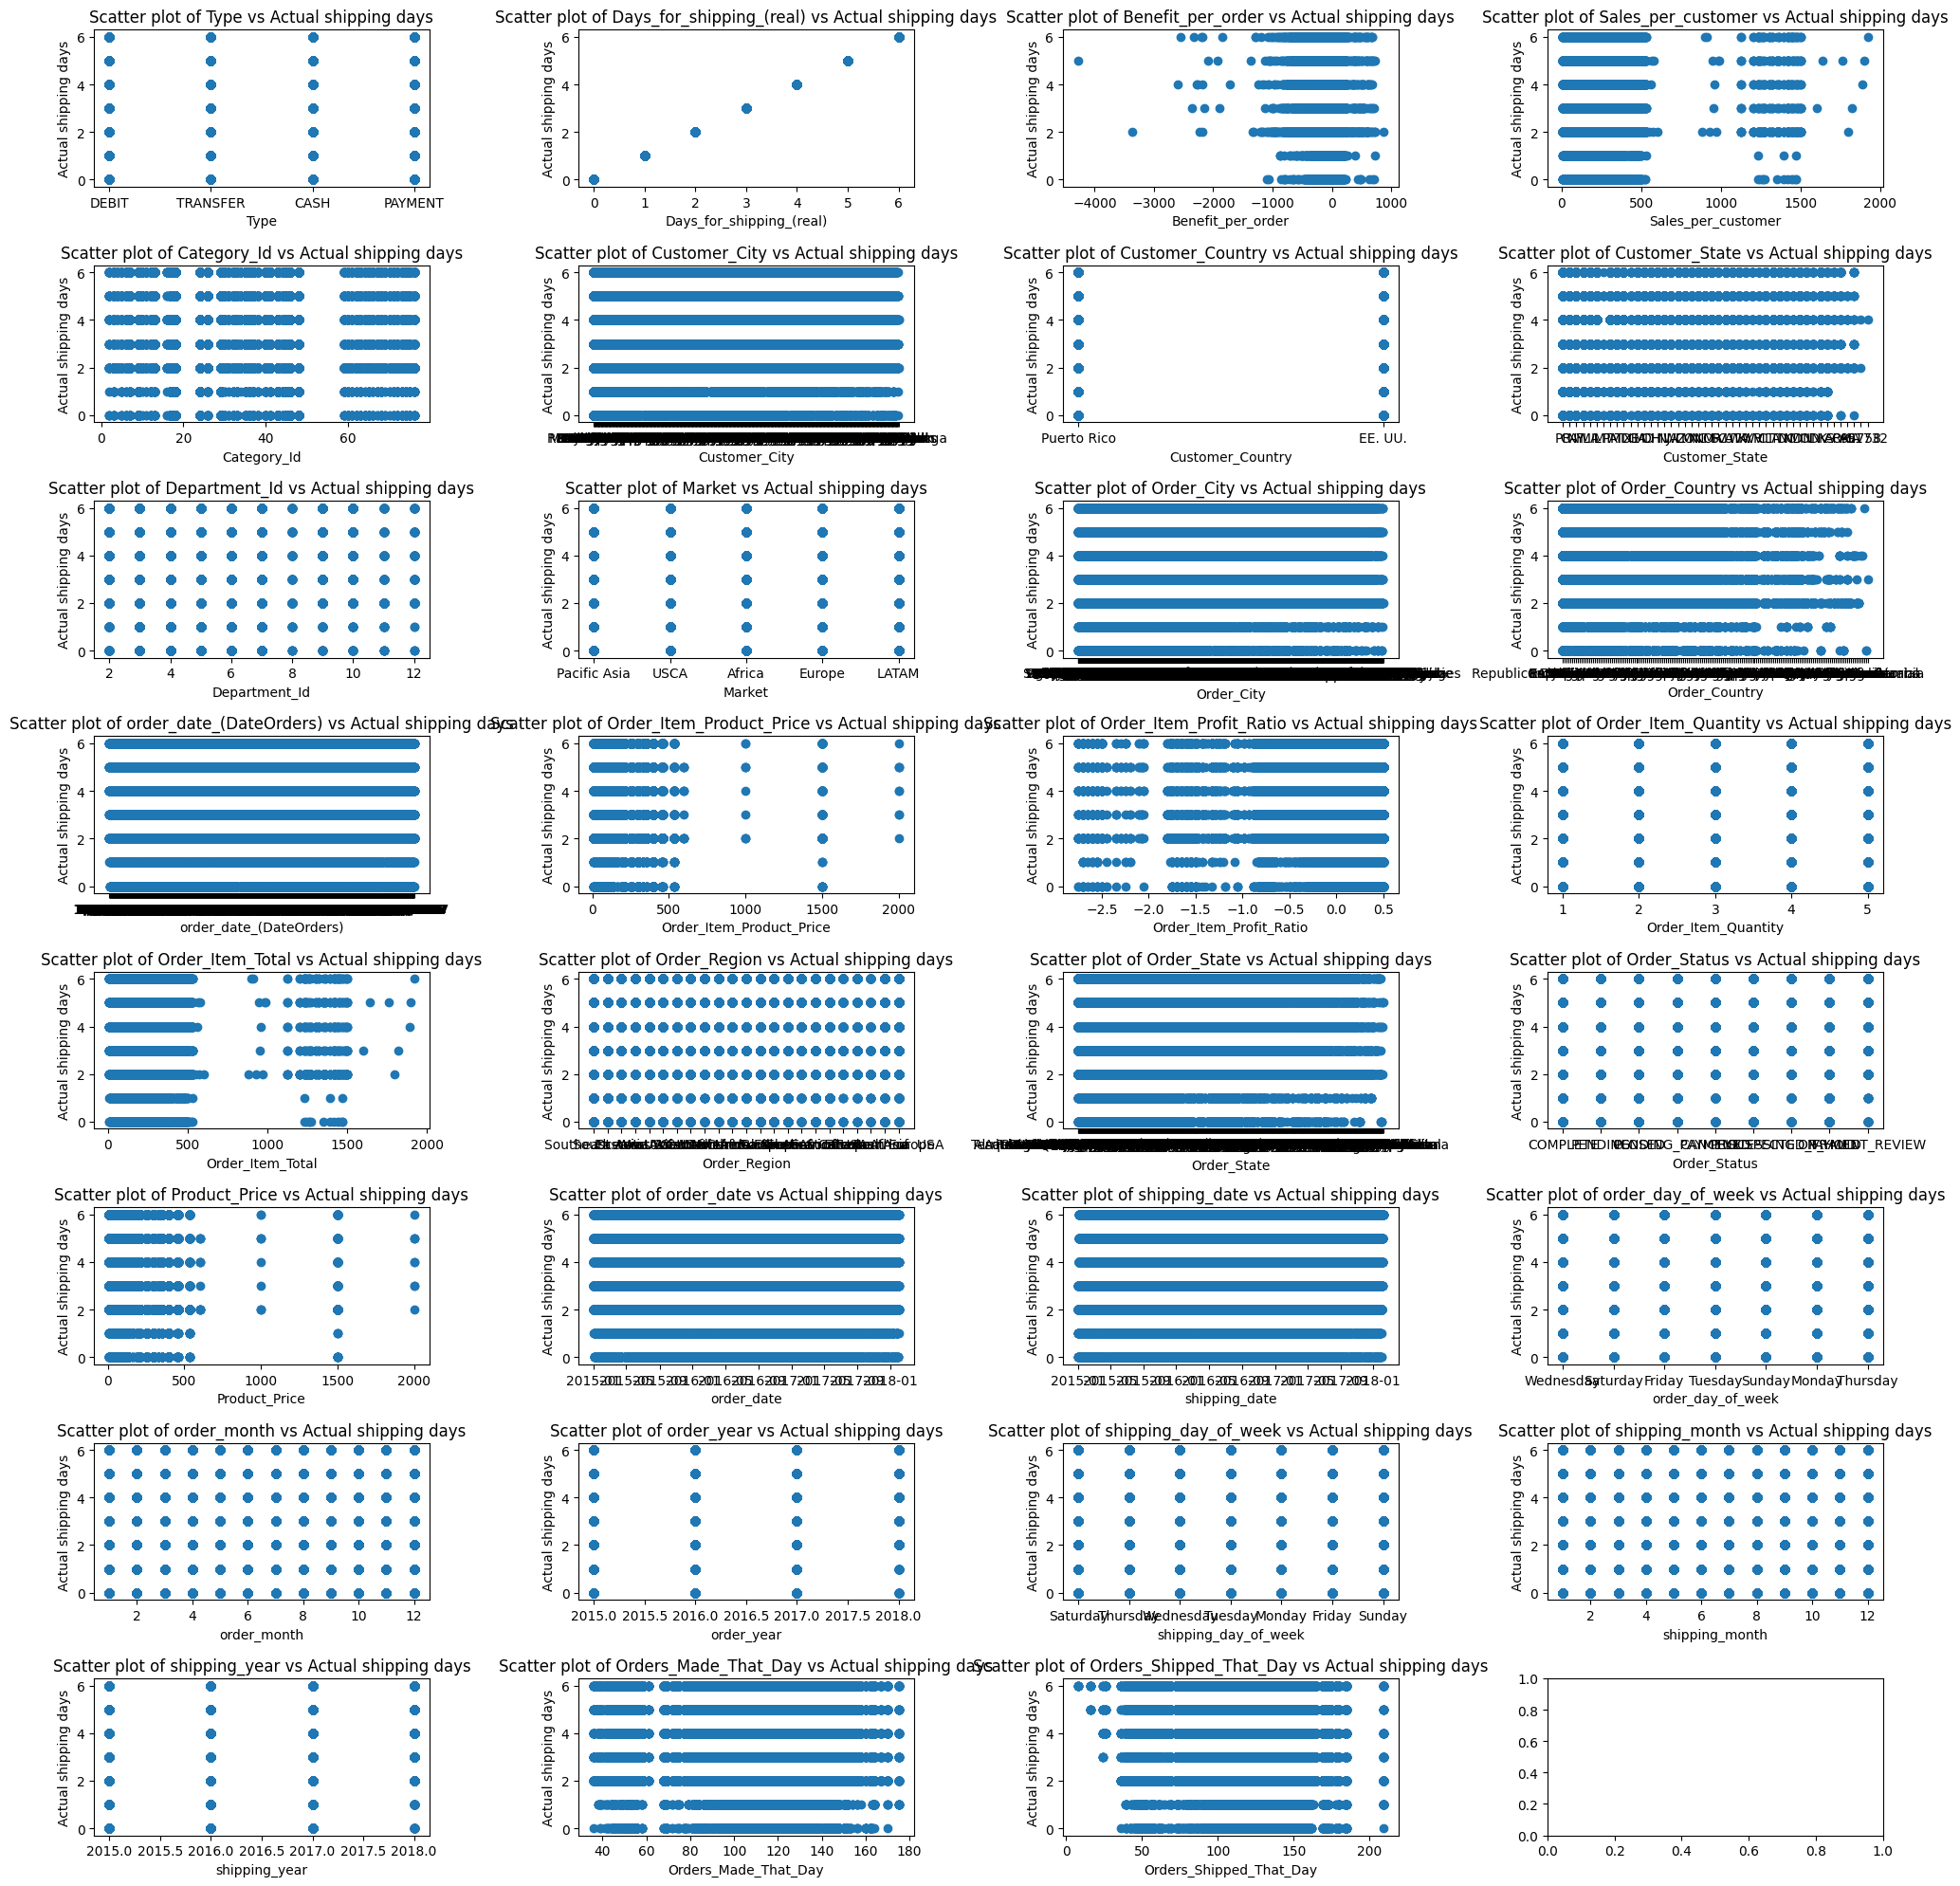

In [14]:
import matplotlib.pyplot as plt

# Set number of rows and columns for the grid
n_rows = 8
n_cols = 4

# Create a grid of subplots (2x2 in this case)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Adjust spacing between subplots (play around with these values)
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, wspace=0.25, hspace=0.35)

# Flatten the grid array for easy access to subplots
axs = axs.flatten()

# Loop through each selected column in the DataFrame
for i, column in enumerate(df_selected.columns):
    # Plot each column against actual shipping days
    axs[i].scatter(df_selected[column], df_selected['Days_for_shipping_(real)'])
    
    # Label x-axis as the current column
    axs[i].set_xlabel(column)
    
    # Label y-axis as 'Actual shipping days'
    axs[i].set_ylabel('Actual shipping days')
    
    # Set title for each subplot
    axs[i].set_title(f'Scatter plot of {column} vs Actual shipping days')

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()

# Display the grid of scatter plots
plt.show()


In [15]:
# Loop through each column in the dataframe
for x in df_selected.columns:
        # Print the count of each unique value in the current column        
        print (df_selected[x].value_counts())

Type
DEBIT       51403
TRANSFER    29275
PAYMENT     28909
CASH        14008
Name: count, dtype: int64
Days_for_shipping_(real)
2    39405
4    19487
3    19451
6    19449
5    18966
0     3481
1     3356
Name: count, dtype: int64
Benefit_per_order
 0.00      794
 72.00     173
 46.80     150
 63.70     139
 62.40     132
          ... 
-117.80      1
-166.13      1
-149.56      1
 337.50      1
 53.14       1
Name: count, Length: 19424, dtype: int64
Sales_per_customer
149.99001    954
107.89000    924
106.59000    923
126.09000    922
122.84000    914
            ... 
23.79000       1
77.40000       1
26.22000       1
929.98999      1
909.98999      1
Name: count, Length: 2843, dtype: int64
Category_Id
17    16479
18    16107
48    15540
24    14285
46    11917
43     9814
9      8474
29     7480
45     5878
37     1378
36     1211
40     1185
35     1070
26      816
13      764
41      691
7       614
75      544
74      529
33      524
63      494
62      459
76      449
32      441

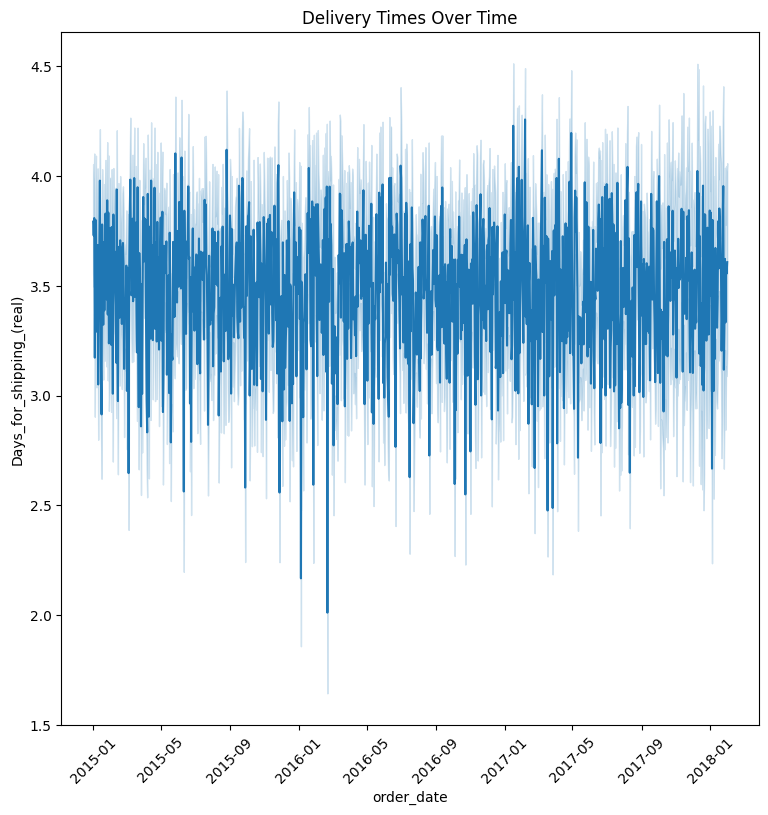

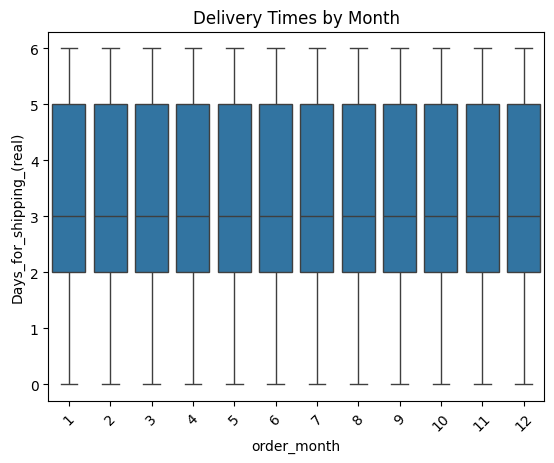

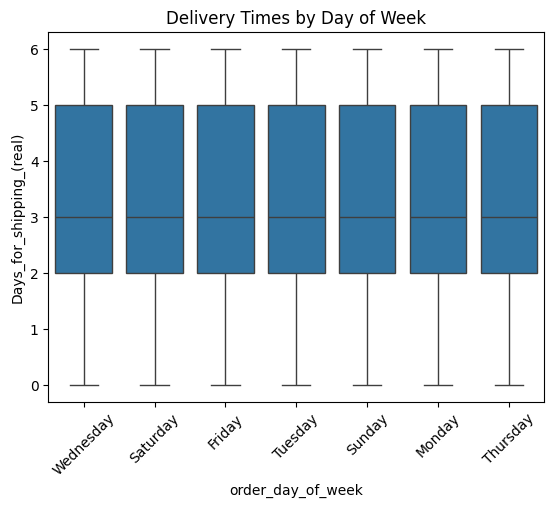

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size for the plots
plt.figure(figsize=(9, 9))

# Plot delivery times over time
sns.lineplot(x='order_date', y='Days_for_shipping_(real)', data=df_selected)
plt.title('Delivery Times Over Time')  # Title 
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

# Plot delivery times by month
sns.boxplot(x='order_month', y='Days_for_shipping_(real)', data=df_selected)
plt.title('Delivery Times by Month')  # Title of the box plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

# Plot delivery times by day of the week
sns.boxplot(x='order_day_of_week', y='Days_for_shipping_(real)', data=df_selected)
plt.title('Delivery Times by Day of Week')  # Title of the box plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot



To improve the accuracy of the analysis, the Isolation Forest algorithm is used to detect and remove outliers from the dataset. This step helps ensure that only consistent data is included, allowing for more reliable insights into Benefit_per_order and Sales_per_customer.

In [17]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest with 1% contamination rate and a fixed random state for reproducibility
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model on 'Benefit_per_order' and 'Sales_per_customer' columns to detect outliers
outliers = iso_forest.fit_predict(df_selected[['Benefit_per_order', 'Sales_per_customer']])

# Keep only the rows where the prediction is not marked as an outlier (-1 represents an outlier)
df_selected = df_selected[outliers != -1]


ensuring consistency across the dataset ,we improve model performance by selecting numerical columns which are then standardized using a scaler. This process adjusts the values of Benefit_per_order, Sales_per_customer, Order_Item_Product_Price, and Product_Price to have a mean of zero and a standard deviation of one, helping to normalize variations and enhance analysis.


In [18]:
from sklearn.preprocessing import StandardScaler

# Define the columns that need to be scaled
columns_to_scale = ['Benefit_per_order', 'Sales_per_customer', 'Order_Item_Product_Price', 'Product_Price']

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler and transform the selected columns
df_selected[columns_to_scale] = scaler.fit_transform(df_selected[columns_to_scale])



In [19]:
# viewing the first to entries in the dataframe
df_selected.head(20)

Type  Days_for_shipping_(real)  Benefit_per_order  Sales_per_customer  \
0      DEBIT                         3           0.867367            1.487424   
1   TRANSFER                         5          -3.591162            1.453578   
2       CASH                         4          -3.574001            1.436655   
3      DEBIT                         3          -0.028557            1.385989   
4    PAYMENT                         2           1.430153            1.318298   
5   TRANSFER                         6          -0.084626            1.284555   
6      DEBIT                         2           0.918851            1.216863   
7   TRANSFER                         2           0.568420            1.183018   
8       CASH                         3           1.423733            1.115429   
9       CASH                         2           1.403166            1.081583   
10  TRANSFER                         6           1.382599            1.047737   
11  TRANSFER                         5           0.270521            1.013995   
12  TRANSFER                         4          -0.042967            0.946303   
13     DEBIT                         2          -0.006025            0.777177   
14  TRANSFER                         2          -0.113316            1.622704   
15     DEBIT                         2          -3.728583            1.588858   
16   PAYMENT                         5          -3.555399            1.555115   
17      CASH                         2          -0.015719            1.521270   
18     DEBIT                         2           1.011600            1.487424   
19   PAYMENT                         0           0.814049            1.453578   

    Category_Id   Customer_City Customer_Country Customer_State  \
0            73          Caguas      Puerto Rico             PR   
1            73          Caguas      Puerto Rico             PR   
2            73        San Jose          EE. UU.             CA   
3            73     Los Angeles          EE. UU.             CA   
4            73          Caguas      Puerto Rico             PR   
5            73       Tonawanda          EE. UU.             NY   
6            73          Caguas      Puerto Rico             PR   
7            73           Miami          EE. UU.             FL   
8            73          Caguas      Puerto Rico             PR   
9            73       San Ramon          EE. UU.             CA   
10           73          Caguas      Puerto Rico             PR   
11           73        Freeport          EE. UU.             NY   
12           73         Salinas          EE. UU.             CA   
13           73          Caguas      Puerto Rico             PR   
14           73         Peabody          EE. UU.             MA   
15           73          Caguas      Puerto Rico             PR   
16           73       Canovanas      Puerto Rico             PR   
17           73       Paramount          EE. UU.             CA   
18           73          Caguas      Puerto Rico             PR   
19           73  Mount Prospect          EE. UU.             IL   

    Department_Id        Market  ... order_date shipping_date  \
0               2  Pacific Asia  ... 2018-01-31    2018-02-03   
1               2  Pacific Asia  ... 2018-01-13    2018-01-18   
2               2  Pacific Asia  ... 2018-01-13    2018-01-17   
3               2  Pacific Asia  ... 2018-01-13    2018-01-16   
4               2  Pacific Asia  ... 2018-01-13    2018-01-15   
5               2  Pacific Asia  ... 2018-01-13    2018-01-19   
6               2  Pacific Asia  ... 2018-01-13    2018-01-15   
7               2  Pacific Asia  ... 2018-01-13    2018-01-15   
8               2  Pacific Asia  ... 2018-01-13    2018-01-16   
9               2  Pacific Asia  ... 2018-01-13    2018-01-15   
10              2  Pacific Asia  ... 2018-01-13    2018-01-19   
11              2  Pacific Asia  ... 2018-01-13    2018-01-18   
12              2  Pacific Asia  ... 2018-01-13    20

##### Exploratory Data Analysis (EDA)

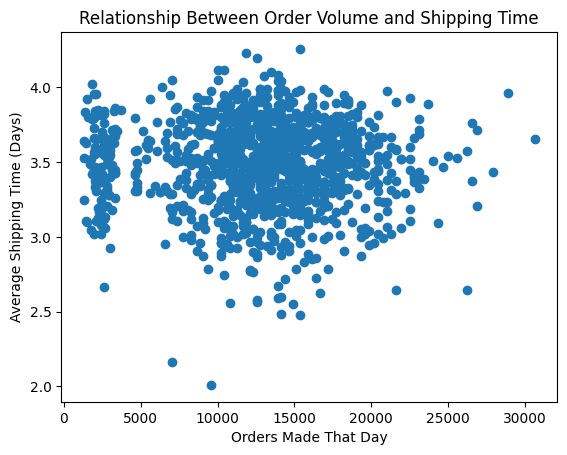

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by order_date and calculate the average shipping time
grouped_data = df.groupby('order_date').agg({'Days_for_shipping_(real)': 'mean', 'Orders_Made_That_Day': 'sum'}).reset_index()

# Create a scatter plot
plt.scatter(grouped_data['Orders_Made_That_Day'], grouped_data['Days_for_shipping_(real)'])
plt.xlabel('Orders Made That Day')
plt.ylabel('Average Shipping Time (Days)')
plt.title('Relationship Between Order Volume and Shipping Time')
plt.show()

Top 3 markets with highest shipping time:
         Market  Days_for_shipping_(real)
2         LATAM                  3.487798
0        Africa                  3.483495
3  Pacific Asia                  3.477958

Top 3 markets with lowest shipping time:
         Market  Days_for_shipping_(real)
4          USCA                  3.462314
1        Europe                  3.477909
3  Pacific Asia                  3.477958


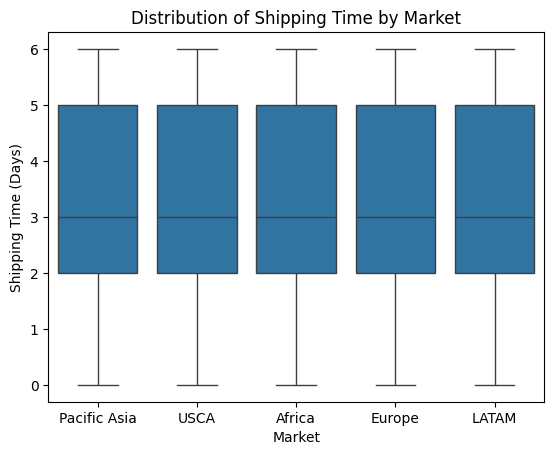

In [21]:
# Group the data by Market and calculate the average shipping time
grouped_data = df.groupby('Market').agg({'Days_for_shipping_(real)': 'mean'}).reset_index()

# Sort the data to get the key markets
top_3_markets_highest = grouped_data.sort_values(by='Days_for_shipping_(real)', ascending=False).head(3)
top_3_markets_lowest = grouped_data.sort_values(by='Days_for_shipping_(real)', ascending=True).head(3)

print("Top 3 markets with highest shipping time:")
print(top_3_markets_highest)

print("\nTop 3 markets with lowest shipping time:")
print(top_3_markets_lowest)

# Create a box plot for visual representation
sns.boxplot(x='Market', y='Days_for_shipping_(real)', data=df)
plt.xlabel('Market')
plt.ylabel('Shipping Time (Days)')
plt.title('Distribution of Shipping Time by Market')
plt.show()


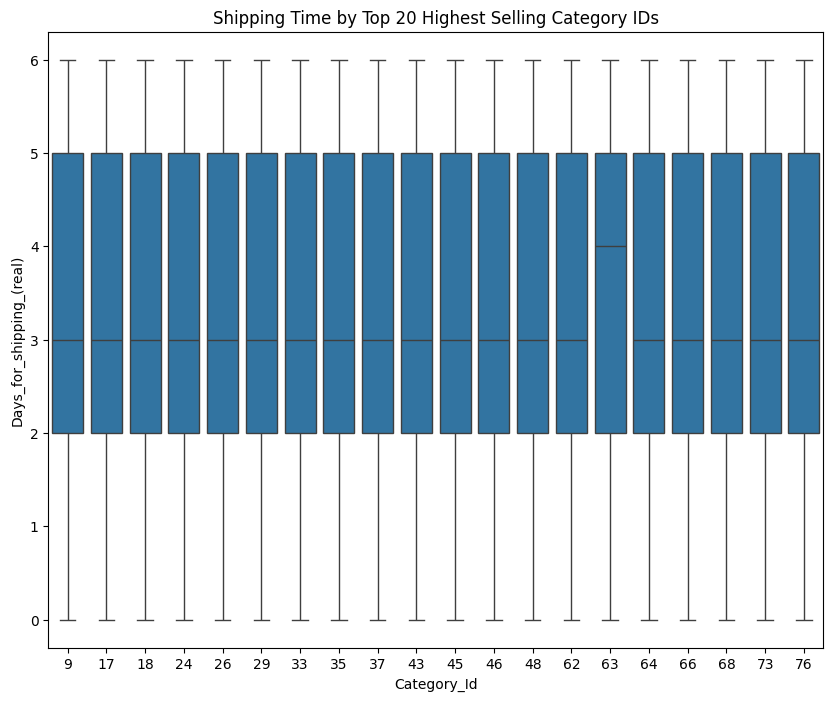

In [22]:
# Group by Category_Id to get total sales or quantity sold
top_20_categories = df.groupby('Category_Id').agg({'Sales_per_customer': 'sum'}).reset_index()

# Sort by sales to get the top 20 categories
top_20_categories = top_20_categories.sort_values(by='Sales_per_customer', ascending=False).head(20)

# Filter the original DataFrame to include only these top 20 categories
df_top_20 = df[df['Category_Id'].isin(top_20_categories['Category_Id'])]

# Group by Category_Id and calculate average shipping time for the top 20 categories
grouped_by_category_top_20 = df_top_20.groupby('Category_Id').agg({'Days_for_shipping_(real)': 'mean'}).reset_index()

# Plot the boxplot for the top 20 categories
plt.figure(figsize=(10,8))
sns.boxplot(x='Category_Id', y='Days_for_shipping_(real)', data=df_top_20)
plt.title('Shipping Time by Top 20 Highest Selling Category IDs')
plt.show()


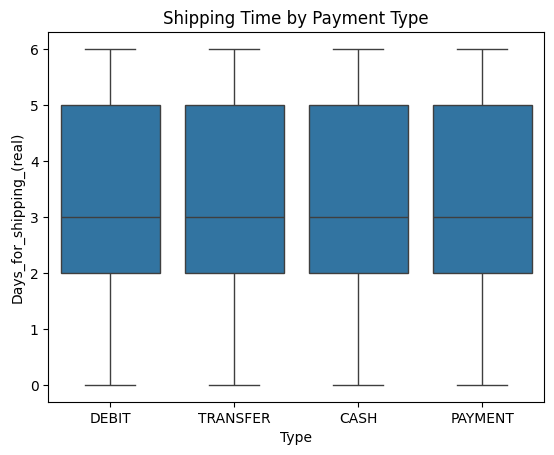

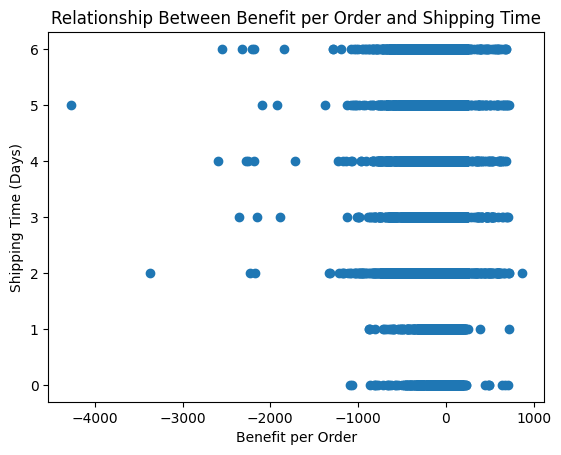

In [23]:

# 2. Payment Type
grouped_by_type = df.groupby('Type').agg({'Days_for_shipping_(real)': 'mean'}).reset_index()
sns.boxplot(x='Type', y='Days_for_shipping_(real)', data=df)
plt.title('Shipping Time by Payment Type')
plt.show()

# 3. Benefit per Order
plt.scatter(df['Benefit_per_order'], df['Days_for_shipping_(real)'])
plt.xlabel('Benefit per Order')
plt.ylabel('Shipping Time (Days)')
plt.title('Relationship Between Benefit per Order and Shipping Time')
plt.show()

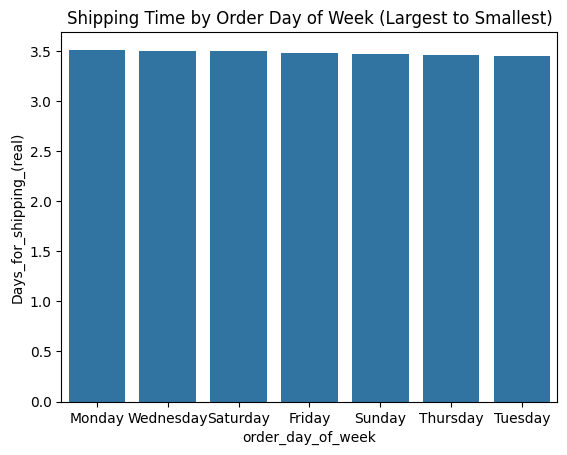

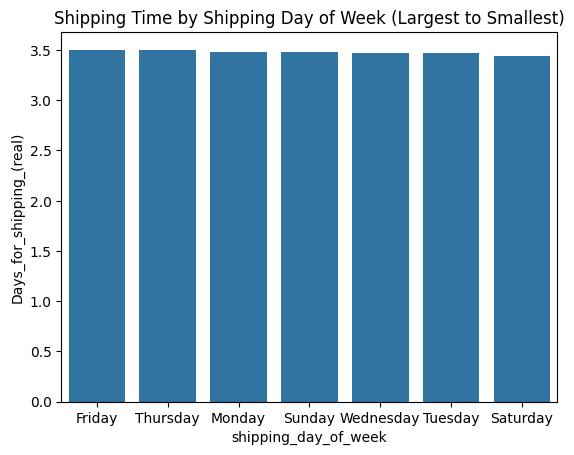

In [24]:


# Group by order day of week and calculate average shipping time, then sort in descending order
grouped_by_order_day = df.groupby('order_day_of_week').agg({'Days_for_shipping_(real)': 'mean'}).reset_index()
grouped_by_order_day = grouped_by_order_day.sort_values('Days_for_shipping_(real)', ascending=False)

# Group by shipping day of week and calculate average shipping time, then sort in descending order
grouped_by_shipping_day = df.groupby('shipping_day_of_week').agg({'Days_for_shipping_(real)': 'mean'}).reset_index()
grouped_by_shipping_day = grouped_by_shipping_day.sort_values('Days_for_shipping_(real)', ascending=False)

# Create bar plots
sns.barplot(x='order_day_of_week', y='Days_for_shipping_(real)', data=grouped_by_order_day)
plt.title('Shipping Time by Order Day of Week (Largest to Smallest)')
plt.show()

sns.barplot(x='shipping_day_of_week', y='Days_for_shipping_(real)', data=grouped_by_shipping_day)
plt.title('Shipping Time by Shipping Day of Week (Largest to Smallest)')
plt.show()


#### **Feature engineering**


##### Notes on Feature Engineering


1. **Price Binning**: Divided `Order_Item_Product_Price` into categories like Low, Medium, and High. This makes it easier for the model to handle and recognize patterns in different price ranges.

2. **Log Transformation**: Used a log transformation on `Order_Item_Profit_Ratio` to manage extreme values and reduce skewness. This helps the model work with more balanced data.

3. **Quantity Binning**: I grouped `Order_Item_Quantity` into common ranges like 1, 2, 3, etc. This simplifies the data and helps the model focus on the most common quantities.

4. **Total Binning**: categorized `Order_Item_Total` into bins such as Low, Medium, and High. This makes it easier to spot trends and simplifies the data for the model.

5. **Interaction Term**: Added a new feature combining `Log_Order_Item_Profit_Ratio` and `Order_Item_Product_Price`. This helps capture how profit and price interact, providing extra insights for better predictions.

The changes make the data easier to work with and help the model identify key patterns and trends.

In [25]:
# 1. Create bins for Order_Item_Product_Price based on its distribution
# Since the data has a wide range of values, we group it into discrete bins to simplify it for the model
df_selected['Price_Binned'] = pd.cut(df_selected['Order_Item_Product_Price'], 
                                     bins=[-np.inf, -0.7, 0, 0.7, np.inf], 
                                     labels=['Low', 'Below_Average', 'Above_Average', 'High'])

# 2. Apply a log transformation to Order_Item_Profit_Ratio to handle extreme outliers and skewness
# A log transformation is appropriate given the wide range of values
df_selected['Log_Order_Item_Profit_Ratio'] = np.log1p(df_selected['Order_Item_Profit_Ratio'])

# 3. Simplify Order_Item_Quantity by grouping frequent values into a few categories
# This helps to reduce the large number of unique values, focusing on the most common quantities
df_selected['Quantity_Binned'] = pd.cut(df_selected['Order_Item_Quantity'], 
                                        bins=[0, 1, 2, 3, 4, 5, np.inf], 
                                        labels=['1', '2', '3', '4', '5', 'More than 5'])

# 4. For Order_Item_Total, group values into bins based on their observed frequency
# This reduces complexity while preserving the core information about total value
df_selected['Total_Binned'] = pd.cut(df_selected['Order_Item_Total'], 
                                     bins=[-np.inf, 100, 150, 200, np.inf], 
                                     labels=['Low', 'Medium', 'High', 'Very_High'])

# 5. Interaction between Log_Order_Item_Profit_Ratio and Price_Binned
# To capture how profit ratios differ across price ranges, create an interaction term
df_selected['Profit_Ratio_x_Price_Binned'] = df_selected['Log_Order_Item_Profit_Ratio'] * df_selected['Order_Item_Product_Price']

# Drop original columns that have been transformed to avoid multicollinearity
df_selected.drop(columns=['Order_Item_Product_Price', 'Order_Item_Profit_Ratio', 
                          'Order_Item_Quantity', 'Order_Item_Total'], inplace=True)

# Display the updated dataframe 
df_selected.head()

c:\Users\SEVEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Type  Days_for_shipping_(real)  Benefit_per_order  Sales_per_customer  \
0     DEBIT                         3           0.867367            1.487424   
1  TRANSFER                         5          -3.591162            1.453578   
2      CASH                         4          -3.574001            1.436655   
3     DEBIT                         3          -0.028557            1.385989   
4   PAYMENT                         2           1.430153            1.318298   

   Category_Id Customer_City Customer_Country Customer_State  Department_Id  \
0           73        Caguas      Puerto Rico             PR              2   
1           73        Caguas      Puerto Rico             PR              2   
2           73      San Jose          EE. UU.             CA              2   
3           73   Los Angeles          EE. UU.             CA              2   
4           73        Caguas      Puerto Rico             PR              2   

         Market  ... shipping_day_of_week shipping_month shipping_year  \
0  Pacific Asia  ...             Saturday              2          2018   
1  Pacific Asia  ...             Thursday              1          2018   
2  Pacific Asia  ...            Wednesday              1          2018   
3  Pacific Asia  ...              Tuesday              1          2018   
4  Pacific Asia  ...               Monday              1          2018   

  Orders_Made_That_Day Orders_Shipped_That_Day Price_Binned  \
0                   51                      24         High   
1                   68                      59         High   
2                   68                      62         High   
3                   68                      67         High   
4                   68                      62         High   

   Log_Order_Item_Profit_Ratio Quantity_Binned Total_Binned  \
0                     0.254642               1    Very_High   
1                    -1.609438               1    Very_High   
2                    -1.609438               1    Very_High   
3                     0.076961               1    Very_High   
4                     0.371564               1    Very_High   

  Profit_Ratio_x_Price_Binned  
0                    0.471771  
1                   -2.981777  
2                   -2.981777  
3                    0.142584  
4                    0.688389  

[5 rows x 32 columns]

The categorical columns are converted into one-hot encoded format to make them usable for analysis. This process creates new binary columns for each category in the selected columns, such as Type, Order_Region, order_day_of_week, shipping_day_of_week, and Market. Dropping the first category prevents issues with multicollinearity in the model.

In [26]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
import pandas as pd

def one_hot_encode_data(df):
    # Specify categorical columns to apply one-hot encoding. 
    # These columns have limited unique values, so this encoding works well.
    columns_to_encode = ['Type', 'Order_Region', 'Market', 'Order_Status']
    
    # Apply one-hot encoding to the specified columns.
    # This creates new binary columns for each category, while dropping the first category to avoid multicollinearity.
    df_encoded = pd.get_dummies(df, columns=columns_to_encode, dtype=int, drop_first=True)

    # Apply label encoding to 'order_day_of_week' and 'shipping_day_of_week'.
    # Each unique value in these columns is assigned a numerical label.
    label_encoder = LabelEncoder()
    label_encoder_pbin = LabelEncoder()
    label_encoder_order = LabelEncoder()
    label_encoder_shipping = LabelEncoder()
    
    # Convert the binned columns to numeric values
    df_encoded['Quantity_Binned'] = label_encoder.fit_transform(df['Quantity_Binned'])
    df_encoded['Total_Binned'] = label_encoder.fit_transform(df['Total_Binned'])
    df_encoded['Order_Day_of_Week_Ordinal'] = label_encoder_order.fit_transform(df['order_day_of_week'])
    df_encoded['Shipping_Day_of_Week_Ordinal'] = label_encoder_shipping.fit_transform(df['shipping_day_of_week'])
    df_encoded['Price_Binned'] = label_encoder_pbin.fit_transform(df['Price_Binned'])

    # Perform frequency encoding for 'Order_City'.
    # Each city is represented by its frequency of occurrence in the dataset.
    order_city_freq = df['Order_City'].value_counts(normalize=True)
    df_encoded['Order_City_Frequency_Encoded'] = df['Order_City'].map(order_city_freq)


    # Apply target encoding for 'Customer_City' and 'Order_Country'.
    # Target encoding assigns values based on the mean of the target variable ('Days_for_shipping_(real)').
    # This helps capture the relationship between the categorical variable and the target variable.
    target_encoder = ce.TargetEncoder(cols=['Customer_City', 'Order_Country'])
    df_encoded[['Customer_City_Target_Encoded', 'Order_Country_Target_Encoded']] = target_encoder.fit_transform(
        df[['Customer_City', 'Order_Country']], df['Days_for_shipping_(real)'])

    return df_encoded

# Call the function to encode the selected dataframe
df_selected = one_hot_encode_data(df_selected)


In [27]:
# Filter the dataframe for rows where Customer_Country is Puerto Rico
df_puerto_rico = df_selected[df_selected['Customer_Country'] == 'Puerto Rico']


df_puerto_rico.drop(columns=['Customer_State','Customer_Country'],inplace = True)

# Display the first few rows to confirm the filter
df_puerto_rico.head(20)

C:\Users\SEVEN\AppData\Local\Temp\ipykernel_7608\3902272840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_puerto_rico.drop(columns=['Customer_State','Customer_Country'],inplace = True)


Days_for_shipping_(real)  Benefit_per_order  Sales_per_customer  \
0                          3           0.867367            1.487424   
1                          5          -3.591162            1.453578   
4                          2           1.430153            1.318298   
6                          2           0.918851            1.216863   
8                          3           1.423733            1.115429   
10                         6           1.382599            1.047737   
13                         2          -0.006025            0.777177   
15                         2          -3.728583            1.588858   
16                         5          -3.555399            1.555115   
18                         2           1.011600            1.487424   
21                         5           0.750120            1.385989   
23                         3          -0.096154            1.284555   
25                         6           1.390328            1.183018   
27                         4           0.753919            1.081583   
30                         6           0.633790            0.946303   
32                         4          -0.006025            1.622704   
35                         2           1.671066            1.521270   
38                         1           0.130480            1.436655   
41                         1           1.449541            1.284555   
43                         3           1.240854            1.183018   

    Category_Id Customer_City  Department_Id  Order_City  Order_Country  \
0            73        Caguas              2      Bekasi      Indonesia   
1            73        Caguas              2     Bikaner          India   
4            73        Caguas              2  Townsville      Australia   
6            73        Caguas              2   Guangzhou          China   
8            73        Caguas              2   Guangzhou          China   
10           73        Caguas              2       Tokio          Japon   
13           73        Caguas              2      Sangli          India   
15           73        Caguas              2      Sangli          India   
16           73     Canovanas              2        Seul  Corea del Sur   
18           73        Caguas              2    Jabalpur          India   
21           73        Caguas              2    Jabalpur          India   
23           73        Caguas              2     Geelong      Australia   
25           73        Caguas              2    Mandurah      Australia   
27           73        Caguas              2      Guilin          China   
30           73        Caguas              2      Guilin          China   
32           73        Caguas              2       Delhi          India   
35           73        Caguas              2    Singapur       Singapur   
38           73        Caguas              2  Wollongong      Australia   
41           73        Caguas              2    Singapur       Singapur   
43           73        Caguas              2       Medan      Indonesia   

   order_date_(DateOrders)            Order_State  ...  \
0                1/31/2018        Java Occidental  ...   
1                1/13/2018               Rajastan  ...   
4                1/13/2018             Queensland  ...   
6                1/13/2018              Guangdong  ...   
8                1/13/2018              Guangdong  ...   
10               1/13/2018                  Tokio  ...   
13               1/13/2018            Maharashtra  ...   
15               1/13/2018            Maharashtra  ...   
16               1/13/2018                   Seul  ...   
18               1/13/2018         Madhya Pradesh  ...   
21               1/13/2018         Madhya Pradesh  ...   
23               1/13/2018               Victoria  ...   
25               1/13/2018   Australia Occidental  ...   
27               1/13/2018                Guangxi  ...   
30               1/13/2018                Guangxi  ...   
32      

In [28]:
# Loop through each column in the dataframe
for x in df_puerto_rico.columns:
        # Print the count of each unique value in the current column        
        print (df_puerto_rico[x].value_counts())

Days_for_shipping_(real)
2    11797
6     6360
3     6338
4     6308
5     6105
0      846
1      763
Name: count, dtype: int64
Benefit_per_order
-0.328028    243
 0.615188     70
 0.506456     50
 0.803831     50
 0.285062     49
            ... 
-0.365757      1
-0.225977      1
-0.226894      1
-0.245366      1
 0.368118      1
Name: count, Length: 11813, dtype: int64
Sales_per_customer
-0.211575    371
 0.097990    351
 0.201179    347
 0.036077    346
-0.005198    343
            ... 
-1.269671      1
-1.388234      1
-1.400514      1
-1.408769      1
-0.054935      1
Name: count, Length: 2219, dtype: int64
Category_Id
48    5936
17    4884
46    4632
18    4477
24    4292
43    2610
9     2392
29    2214
45    1700
36     416
35     410
37     382
40     349
26     249
7      244
13     219
74     213
41     206
33     187
32     182
75     153
63     137
73     137
3      126
62     118
76     118
67     110
30     101
72     101
65      95
66      94
44      93
12      84
68   

In [29]:
df_puerto_rico.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38517 entries, 0 to 123594
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Days_for_shipping_(real)      38517 non-null  int64         
 1   Benefit_per_order             38517 non-null  float64       
 2   Sales_per_customer            38517 non-null  float64       
 3   Category_Id                   38517 non-null  int64         
 4   Customer_City                 38517 non-null  object        
 5   Department_Id                 38517 non-null  int64         
 6   Order_City                    38517 non-null  object        
 7   Order_Country                 38517 non-null  object        
 8   order_date_(DateOrders)       38517 non-null  object        
 9   Order_State                   38517 non-null  object        
 10  Product_Price                 38517 non-null  float64       
 11  order_date                    38

In [30]:
df_puerto_rico.dropna(inplace=True)

C:\Users\SEVEN\AppData\Local\Temp\ipykernel_7608\427217003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_puerto_rico.dropna(inplace=True)


In [31]:
numeric_only_df = df_puerto_rico.select_dtypes(include= [float ,int])

#### **Model selection , Methodology and HyperParameter tuning**

for our first model only the numeric columns are used as features, excluding the target column Days_for_shipping_(real), which is the variable being predicted. The data is split into training and testing sets, with 20% reserved for testing to evaluate model performance. Adding a constant ensures the model includes an intercept term. An Ordinary Least Squares (OLS) regression model is then created and trained using the training data.

##### 1. Statsmodels Linear Model (OLS)

In [32]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Define feature columns by dropping the target column and selecting only numeric columns
X = numeric_only_df.drop(columns=['Days_for_shipping_(real)']).select_dtypes(include=[float, int]) # Feature columns

# Define the target column
y = numeric_only_df['Days_for_shipping_(real)'] # Target column

# Split the data into training and testing sets
# - test_size=0.2: 20% of the data will be used for testing
# - random_state=42: Ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the model (intercept term)
X_train = sm.add_constant(X_train)

# Create and fit the Ordinary Least Squares (OLS) regression model
lm = sm.OLS(y_train, X_train).fit()

# Print the summary of the fitted model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Days_for_shipping_(real)   R-squared:                       0.040
Model:                                  OLS   Adj. R-squared:                  0.038
Method:                       Least Squares   F-statistic:                     24.25
Date:                      Sun, 08 Sep 2024   Prob (F-statistic):          2.37e-220
Time:                              16:26:49   Log-Likelihood:                -55882.
No. Observations:                     29934   AIC:                         1.119e+05
Df Residuals:                         29882   BIC:                         1.123e+05
Df Model:                                51                                         
Covariance Type:                  nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           30.7010     16.373      1.875      0.061      -1.391      62.793
Benefit_per_order                0.0273      0.027      1.026      0.305      -0.025       0.079
Sales_per_customer               0.0134      0.028      0.479      0.632      -0.042       0.068
Category_Id                     -0.0025      0.001     -1.752      0.080      -0.005       0.000
Department_Id                    0.0017      0.012      0.136      0.892      -0.022       0.026
Product_Price                    0.0009      0.032      0.027      0.978      -0.061       0.063
order_month                     -0.7648      0.029    -26.019      0.000      -0.822      -0.707
order_year                      -9.3106      0.340    -27.360      0.000      -9.978      -8.644
shipping_month                   0.7572      0.029     25.784      0.000       0.700       0.815
shipping_year                    9.2876      0.340     27.308      0.000       8.621       9.954
Orders_Made_That_Day             0.0007      0.001      1.146      0.252      -0.000       0.002
Orders_Shipped_That_Day         -0.0042      0.000     -8.665      0.000      -0.005      -0.003
Price_Binned                     0.0263      0.010      2.724      0.006       0.007       0.045
Log_Order_Item_Profit_Ratio     -0.0439      0.047     -0.927      0.354      -0.137       0.049
Quantity_Binned                 -0.0119      0.016     -0.722      0.470      -0.044       0.020
Total_Binned                    -0.0134      0.010     -1.316      0.188      -0.033       0.007
Profit_Ratio_x_Price_Binned     -0.0064      0.028     -0.230      0.818      -0.061       0.048
Type_DEBIT                       6.2803      3.275      1.918      0.055      -0.138      12.699
Type_PAYMENT                     6.1172      3.275      1.868      0.062      -0.302      12.536
Type_TRANSFER                    9.1082      4.912      1.854      0.064      -0.520      18.737
Order_Region_Caribbean           0.9262      0.487      1.904      0.057      -0.027       1.880
Order_Region_Central Africa      3.8077      1.950      1.952      0.051      -0.015       7.630
Order_Region_Central America     0.9141      0.487      1.878      0.060      -0.040       1.868
Order_Region_Central Asia        0.6395      0.314      2.034      0.042       0.023       1.256
Order_Region_East Africa         3.6876      1.950      1.891      0.059      -0.134       7.510
Order_Region_East of USA        -0.1696      0.131     -1.294      0.196      -0.426       0.087
Order_Region_Eastern Asia        0.3871      0.280      1.382      0.167      -0.162       0.936
Order_Region_Eastern Europe      0.8024      0.394      2.035      0.042       0.030       1.575
Order_Regi

The model's R-squared value is low, indicating it only explains a small fraction of the variation in shipping days. Additionally, several variables show insignificant coefficients with high p-values, suggesting they are not contributing to the model. This points to a **potential non-linear relationship** that cannot be adequately captured by the current linear model, and a different modeling approach might be necessary for better accuracy.

In [33]:
X_train.shape

(29934, 59)

In [34]:
numeric_only_df.columns

Index(['Days_for_shipping_(real)', 'Benefit_per_order', 'Sales_per_customer',
       'Category_Id', 'Department_Id', 'Product_Price', 'order_month',
       'order_year', 'shipping_month', 'shipping_year', 'Orders_Made_That_Day',
       'Orders_Shipped_That_Day', 'Price_Binned',
       'Log_Order_Item_Profit_Ratio', 'Quantity_Binned', 'Total_Binned',
       'Profit_Ratio_x_Price_Binned', 'Type_DEBIT', 'Type_PAYMENT',
       'Type_TRANSFER', 'Order_Region_Caribbean',
       'Order_Region_Central Africa', 'Order_Region_Central America',
       'Order_Region_Central Asia', 'Order_Region_East Africa',
       'Order_Region_East of USA', 'Order_Region_Eastern Asia',
       'Order_Region_Eastern Europe', 'Order_Region_North Africa',
       'Order_Region_Northern Europe', 'Order_Region_Oceania',
       'Order_Region_South America', 'Order_Region_South Asia',
       'Order_Region_South of  USA', 'Order_Region_Southeast Asia',
       'Order_Region_Southern Africa', 'Order_Region_Southern Europe',

##### 2.  Sklearn's Linear Model

In [35]:
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
# - test_size=0.2: 20% of the data will be used for testing
# - random_state=42: Ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
model = lr.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = model.predict(X_test)


In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Evaluate the model's performance using regression metrics

# Mean Absolute Error (MAE) measures the average magnitude of errors in predictions.
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))

# Mean Squared Error (MSE) measures the average of the squares of the errors.
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

# Root Mean Squared Error (RMSE) is the square root of MSE, giving error magnitude in the same units as the target.
print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))

# R-squared (R2) shows how well the model's predictions match the actual data, with 1 being perfect prediction.
print("R-squared (R2):", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 1.358586139597125
Mean Squared Error (MSE): 2.4372027334649324
Root Mean Squared Error (RMSE): 1.5611542952139397
R-squared (R2): 0.04266170122082613


c:\Users\SEVEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The model's R-squared value is similarly low, indicating it only explains a small fraction of the variation in shipping days. This points to a **potential non-linear relationship** that cannot be adequately captured by the current linear model, and a different modeling approach should be considered.

##### 3. Logistic Regression classiifier model

In [37]:
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define feature columns by dropping the target column and selecting only numeric columns
X = numeric_only_df.drop(columns=['Days_for_shipping_(real)']).select_dtypes(include=[float, int]) # Feature columns


# Define the target column
y = numeric_only_df['Days_for_shipping_(real)'] # Target column

# Split the data into training and testing sets
# - 30% of the data is used for testing
# - random_state=42 ensures the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [38]:
# Initialize the Logistic Regression model
# - solver='liblinear': Uses the liblinear solver for small datasets or binary classification.
# - multi_class='ovr': Uses one-vs-rest for handling multiple classes.
model = LogisticRegression(solver='liblinear', multi_class='ovr')

# Train the model with the training data
model.fit(X_train, y_train)


c:\Users\SEVEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', solver='liblinear')

In [39]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       247
           1       0.00      0.00      0.00       219
           2       0.31      1.00      0.47      3468
           3       0.00      0.00      0.00      1818
           4       0.00      0.00      0.00      1834
           5       0.00      0.00      0.00      1767
           6       0.00      0.00      0.00      1873

    accuracy                           0.31     11226
   macro avg       0.04      0.14      0.07     11226
weighted avg       0.10      0.31      0.15     11226



c:\Users\SEVEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SEVEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SEVEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

The model isn't performing well:

Precision, Recall, F1-Score: It’s failing to predict most classes, with scores of 0.00 for many.
Accuracy: The overall accuracy is just 32%, indicating it's not working effectively.
Averages: Both macro and weighted averages are low, showing poor performance across the board.
Next Steps: The model needs adjustments or better data to improve its predictions for most classes.

In [40]:
# Evaluate the model's performance using regression metrics

# Mean Absolute Error (MAE) measures the average magnitude of errors in predictions.
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))

# Mean Squared Error (MSE) measures the average of the squares of the errors.
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

# Root Mean Squared Error (RMSE) is the square root of MSE, giving error magnitude in the same units as the target.
print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))

# R-squared (R2) shows how well the model's predictions match the actual data, with 1 being perfect prediction.
print("R-squared (R2):", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 1.6917869232139675
Mean Squared Error (MSE): 5.009086050240513
Root Mean Squared Error (RMSE): 2.23809875792837
R-squared (R2): -0.9562073385732774


c:\Users\SEVEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The model's R-squared value is also low explaining only a small fraction of the variation in shipping days. This can be a **potential non-linear relationship** or requiredhyperparameter tuning.


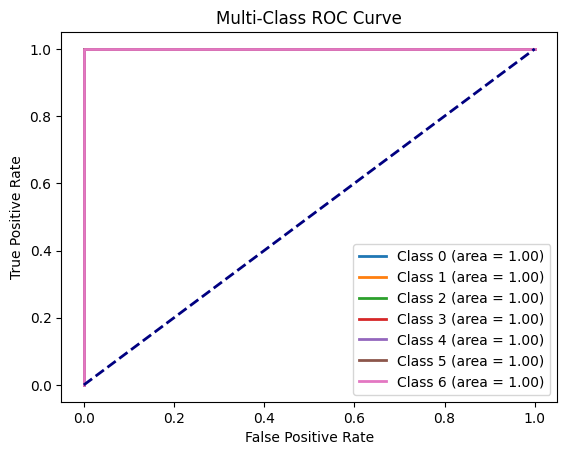

In [72]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Assuming you have more than two classes
y_test_bin = label_binarize(y_test, classes=[0, 1, 2,3,4,5,6])  # Modify for the number of classes
n_classes = y_test_bin.shape[1]

# Fit the model
y_score = model.predict_proba(X_test)

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()


##### 4 .Sklearn's Random Forest Classifier

The RandomForestClassifier is a powerful machine learning algorithm used for classification tasks. It works by creating multiple decision trees during training and merging their results to improve accuracy and avoid overfitting. 

In [42]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.27      0.42       165
           1       0.93      0.26      0.40       151
           2       0.61      0.97      0.75      2276
           3       0.87      0.67      0.76      1250
           4       0.86      0.66      0.74      1233
           5       0.87      0.64      0.74      1170
           6       0.86      0.70      0.77      1239

    accuracy                           0.74      7484
   macro avg       0.85      0.60      0.65      7484
weighted avg       0.79      0.74      0.74      7484



In [43]:
# Cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)


Cross-validation scores: [0.54676644 0.50815072 0.71712988 0.58706401 0.45048777]


In [44]:
from imblearn.over_sampling import RandomOverSampler

# Handle class imbalance by oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Build the Random Forest model using the balanced data
model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

# Make predictions on the test set and evaluate performance
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Perform 5-fold cross-validation to assess model stability
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)


              precision    recall  f1-score   support

           0       0.92      0.49      0.64       165
           1       0.90      0.42      0.58       151
           2       0.70      0.94      0.80      2276
           3       0.84      0.72      0.77      1250
           4       0.82      0.71      0.76      1233
           5       0.84      0.71      0.77      1170
           6       0.82      0.77      0.79      1239

    accuracy                           0.78      7484
   macro avg       0.83      0.68      0.73      7484
weighted avg       0.79      0.78      0.78      7484

Cross-validation scores: [0.53500802 0.54930518 0.74104757 0.59922491 0.4837632 ]


the model has an accuracy of 78 %  . this is better but for the Precision, Recall, F1-Score there is more refinement to be done 




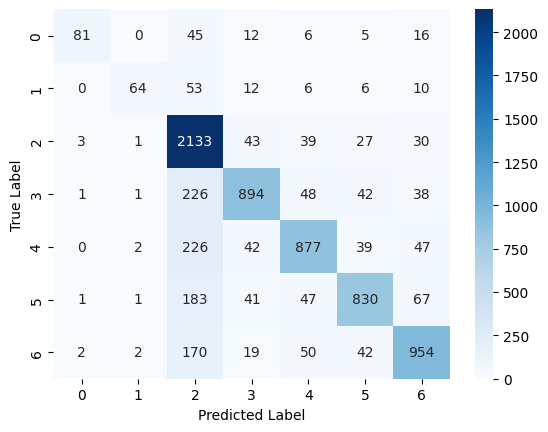

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



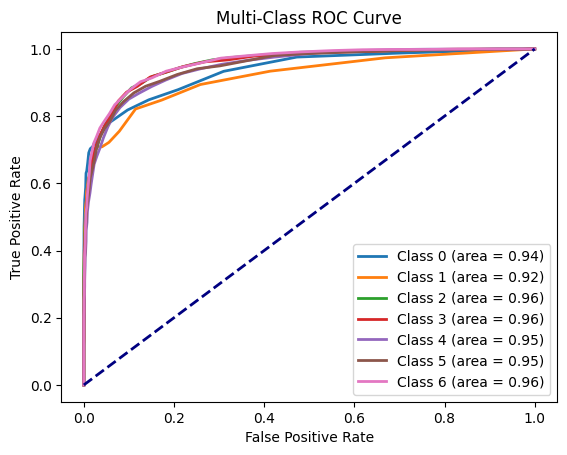

Mean Absolute Error (MAE): 0.4722073757349011
Mean Squared Error (MSE): 1.300106894708712
Root Mean Squared Error (RMSE): 1.1402223005663028
R-squared (R2): 0.48931530983389926


c:\Users\SEVEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [46]:
from sklearn.metrics import roc_curve, auc, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming the model is multiclass and you have more than 7 classes (from 0 to 6)
# Binarize the test labels for multi-class ROC curve analysis
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])  # Specify classes from 0 to 6
n_classes = y_test_bin.shape[1]

# Get the predicted probabilities for each class
y_score = model.predict_proba(X_test)

# Loop through each class and plot its ROC curve
plt.figure(figsize=(10, 8))  # Set figure size for better clarity
for i in range(n_classes):
    # Calculate False Positive Rate (FPR) and True Positive Rate (TPR)
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    
    # Compute Area Under the Curve (AUC) for the current class
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve for the current class
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Add a diagonal line to represent a random classifier (chance level)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize plot aesthetics
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')  # Place the legend at the bottom-right corner
plt.grid(True)  # Add grid for better readability
plt.show()

# After evaluating the model with ROC curves, move to regression metrics to assess performance

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Compute Root Mean Squared Error (RMSE), a square root of MSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Compute R-squared (R2) score, which represents the proportion of variance explained by the model
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)


In [47]:
# Loop through each column in the dataframe and print the counts of unique values
for x in numeric_only_df.columns:
    # Print the count of each unique value in the current column
    print(numeric_only_df[x].value_counts())


Days_for_shipping_(real)
2    11503
6     6177
4     6129
3     6128
5     5918
0      819
1      744
Name: count, dtype: int64
Benefit_per_order
-0.328028    243
 0.615188     70
 0.803831     50
 0.506456     50
 0.285062     49
            ... 
-0.388289      1
-0.202004      1
-0.326063      1
-0.347810      1
 0.368118      1
Name: count, Length: 11014, dtype: int64
Sales_per_customer
-0.211575    355
 0.097990    339
 0.201179    336
-0.005198    335
 0.242454    333
            ... 
-1.661374      1
-1.553129      1
-1.359341      1
-1.336640      1
-0.054935      1
Name: count, Length: 2196, dtype: int64
Category_Id
48    5738
17    4723
46    4477
18    4334
24    4182
43    2536
9     2361
29    2134
45    1697
35     403
36     397
37     365
40     337
26     241
7      237
13     214
74     207
41     201
33     181
32     177
75     146
63     136
73     135
3      126
62     118
76     117
67     107
72      98
30      97
66      94
65      94
44      88
68      84
12   

In [48]:
import xgboost as xgb
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

model = xgb.XGBClassifier()
model.fit(X_resampled, y_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [49]:
X_train.head()

Benefit_per_order  Sales_per_customer  Category_Id  Department_Id  \
105554          -0.098905           -1.243564           46              7   
123104           1.454519            2.140813            9              3   
10849            0.079651            0.809888           43              7   
13119           -0.076504            2.202933           45              7   
26684           -1.239804            1.831454           45              7   

        Product_Price  order_month  order_year  shipping_month  shipping_year  \
105554      -0.725252            5        2017               5           2017   
123104      -0.261511            7        2016               7           2016   
10849        1.592989            2        2015               2           2015   
13119        2.520286            9        2015               9           2015   
26684        2.520286           12        2015              12           2015   

        Orders_Made_That_Day  ...  Order_Status_PAYMENT_REVIEW  \
105554                   111  ...                            0   
123104                    85  ...                            0   
10849                    121  ...                            0   
13119                    103  ...                            0   
26684                    119  ...                            0   

        Order_Status_PENDING  Order_Status_PENDING_PAYMENT  \
105554                     1                             0   
123104                     0                             0   
10849                      0                             0   
13119                      0                             0   
26684                      0                             0   

        Order_Status_PROCESSING  Order_Status_SUSPECTED_FRAUD  \
105554                        0                             0   
123104                        1                             0   
10849                         1                             0   
13119                         0                             0   
26684                         0                             0   

        Order_Day_of_Week_Ordinal  Shipping_Day_of_Week_Ordinal  \
105554                          2                             5   
123104                          0                             3   
10849                           0                             3   
13119                           1                             0   
26684                           4                             2   

        Order_City_Frequency_Encoded  Customer_City_Target_Encoded  \
105554                      0.000433                      3.563726   
123104                      0.004961                      3.563726   
10849                       0.010085                      3.563726   
13119                       0.002109                      3.427279   
26684                       0.002321                      3.563726   

        Order_Country_Target_Encoded  
105554                      3.509363  
123104                      3.466679  
10849                       3.464115  
13119                       3.423427  
26684                       3.355634  

[5 rows x 58 columns]

In [50]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
# Cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       151
           2       1.00      1.00      1.00      2276
           3       1.00      1.00      1.00      1250
           4       1.00      1.00      1.00      1233
           5       1.00      1.00      1.00      1170
           6       1.00      1.00      1.00      1239

    accuracy                           1.00      7484
   macro avg       1.00      1.00      1.00      7484
weighted avg       1.00      1.00      1.00      7484

Cross-validation scores: [1.         1.         1.         0.99986636 1.        ]


In [51]:
# Evaluate the model with regression metrics
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
print("R-squared (R2):", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared (R2): 1.0


c:\Users\SEVEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


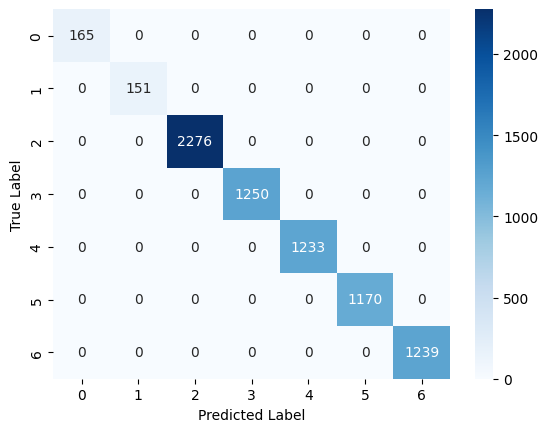

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the model
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


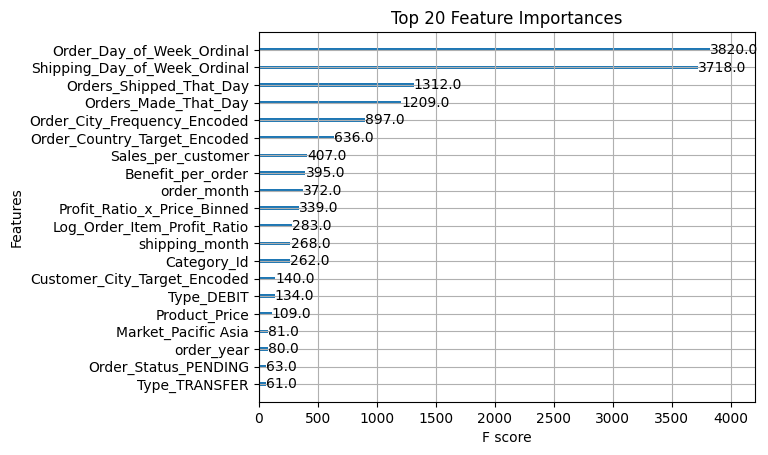

In [53]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Get the feature importance from the model
importance = model.get_booster().get_score(importance_type='weight')

# Sort the features by importance and select the top 15
sorted_importance = dict(sorted(importance.items(), key=lambda x: x[1], reverse=True)[:20])

# Convert the sorted importance to a list of tuples for easier plotting
sorted_importance_list = list(sorted_importance.items())

# Plot the importance for top 15 features
xgb.plot_importance(model, importance_type='weight', max_num_features=20)
plt.title('Top 20 Feature Importances')
plt.show()


In [54]:
sorted_importance_list

[('Order_Day_of_Week_Ordinal', 3820.0),
 ('Shipping_Day_of_Week_Ordinal', 3718.0),
 ('Orders_Shipped_That_Day', 1312.0),
 ('Orders_Made_That_Day', 1209.0),
 ('Order_City_Frequency_Encoded', 897.0),
 ('Order_Country_Target_Encoded', 636.0),
 ('Sales_per_customer', 407.0),
 ('Benefit_per_order', 395.0),
 ('order_month', 372.0),
 ('Profit_Ratio_x_Price_Binned', 339.0),
 ('Log_Order_Item_Profit_Ratio', 283.0),
 ('shipping_month', 268.0),
 ('Category_Id', 262.0),
 ('Customer_City_Target_Encoded', 140.0),
 ('Type_DEBIT', 134.0),
 ('Product_Price', 109.0),
 ('Market_Pacific Asia', 81.0),
 ('order_year', 80.0),
 ('Order_Status_PENDING', 63.0),
 ('Type_TRANSFER', 61.0)]

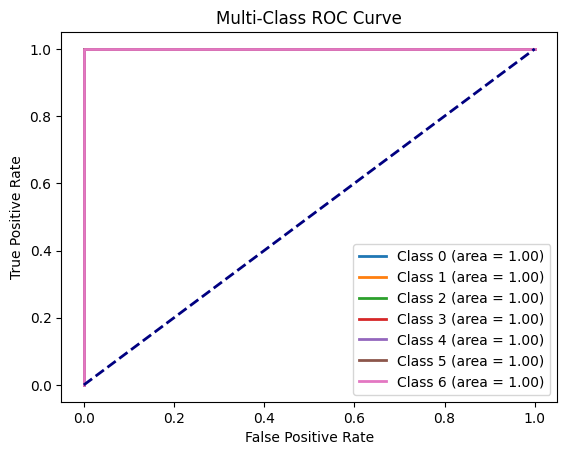

In [55]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Assuming you have more than two classes
y_test_bin = label_binarize(y_test, classes=[0, 1, 2,3,4,5,6])  # Modify for the number of classes
n_classes = y_test_bin.shape[1]

# Fit the model
y_score = model.predict_proba(X_test)

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()


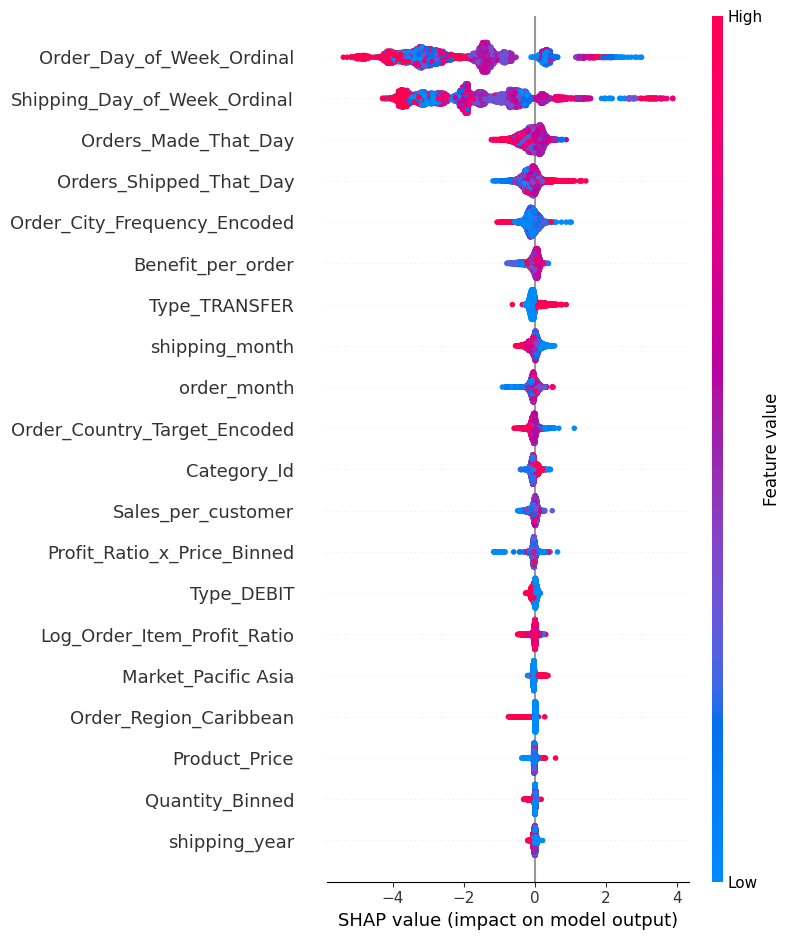

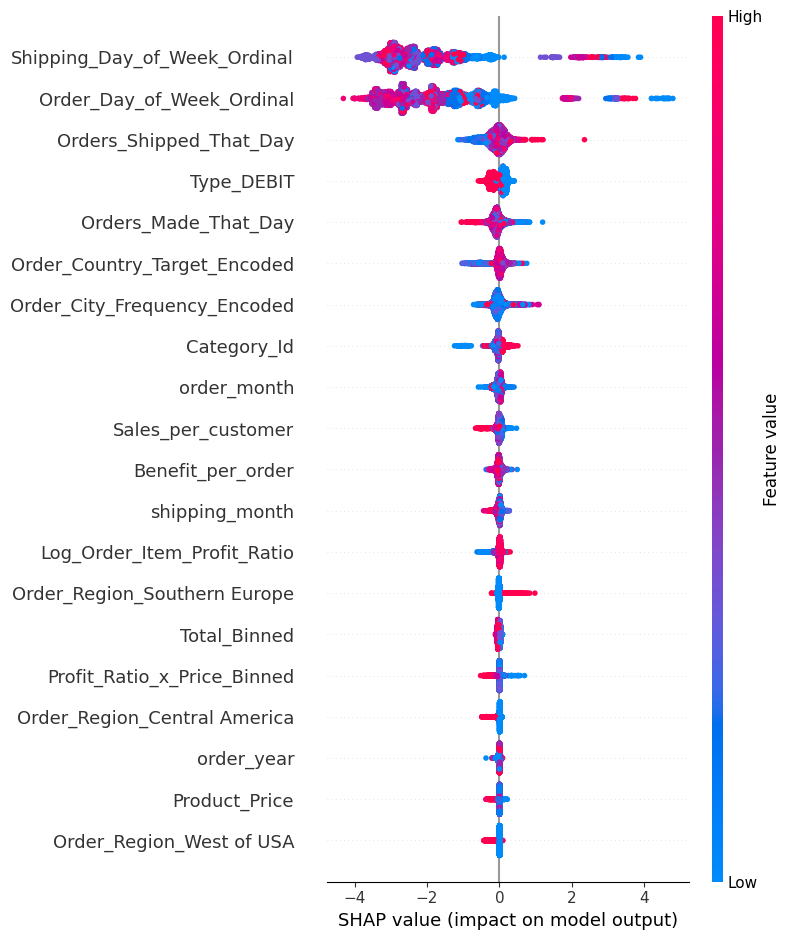

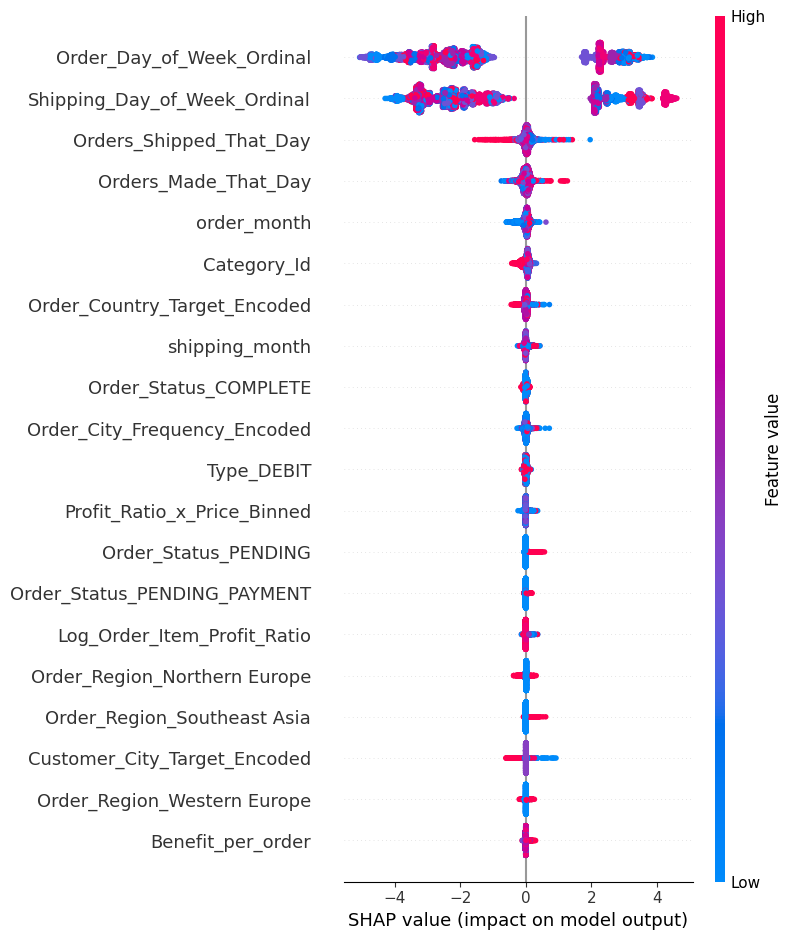

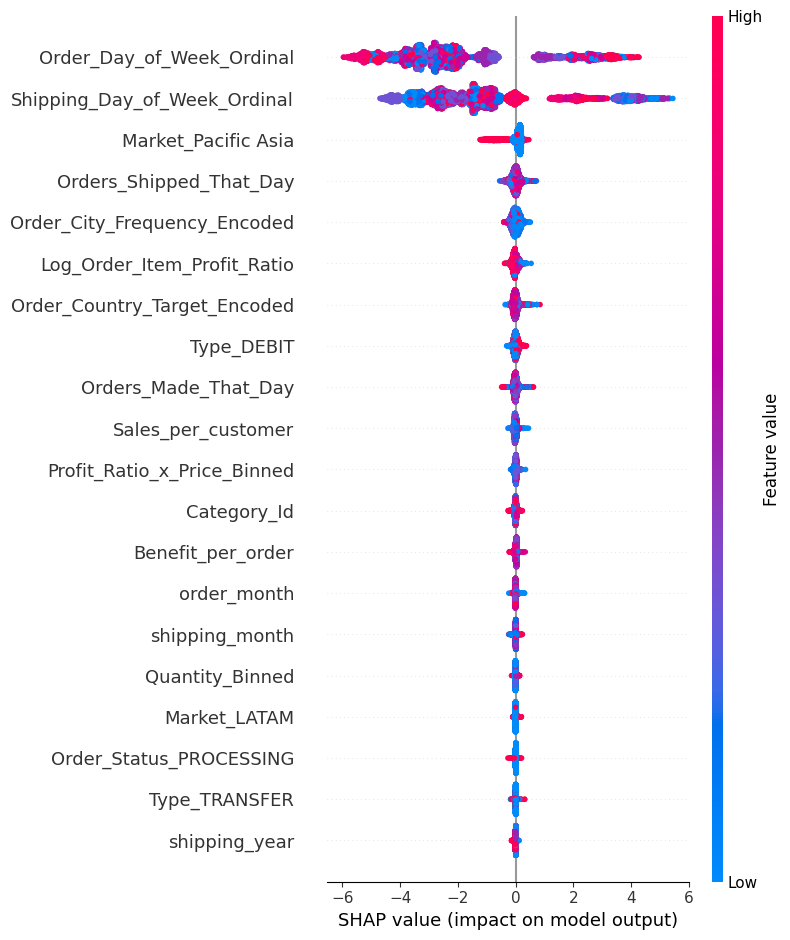

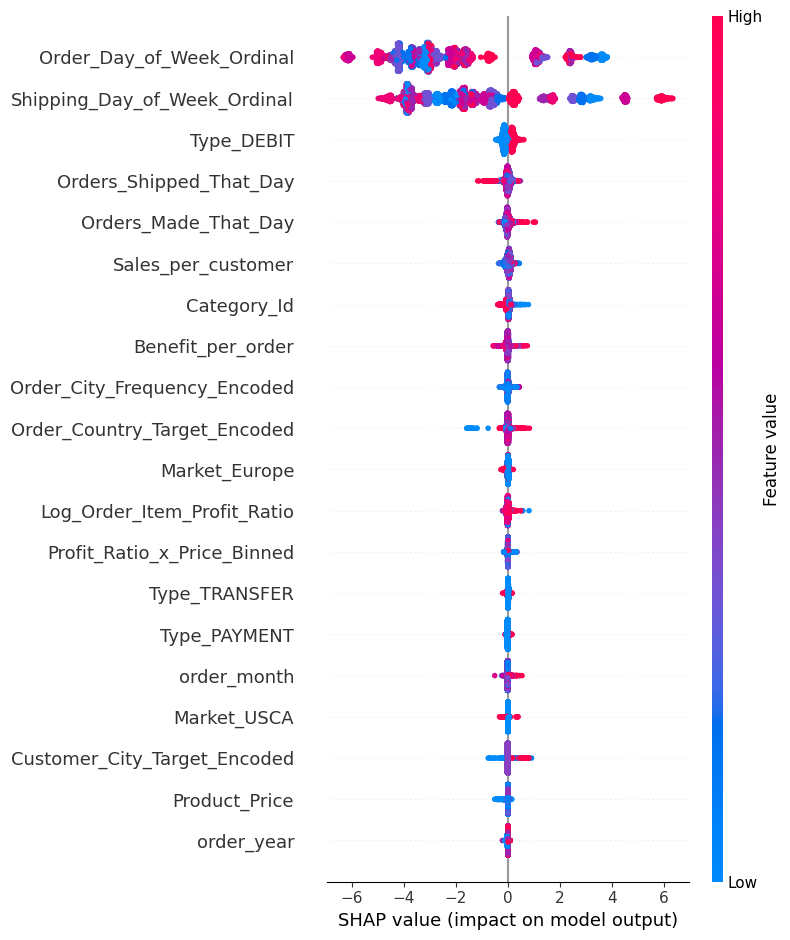

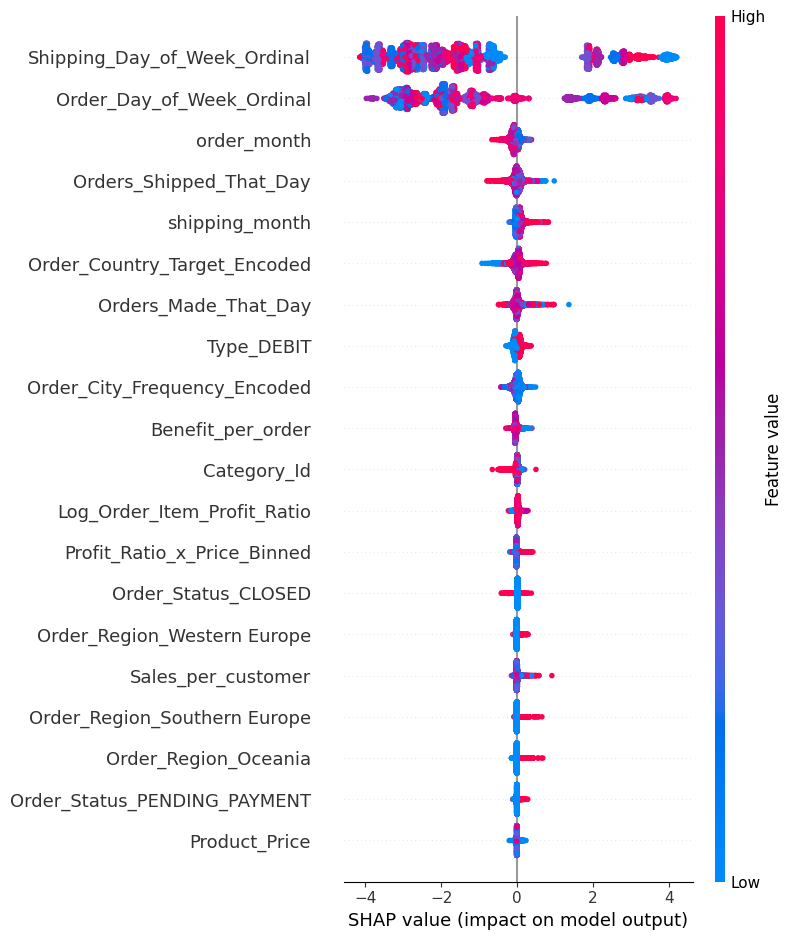

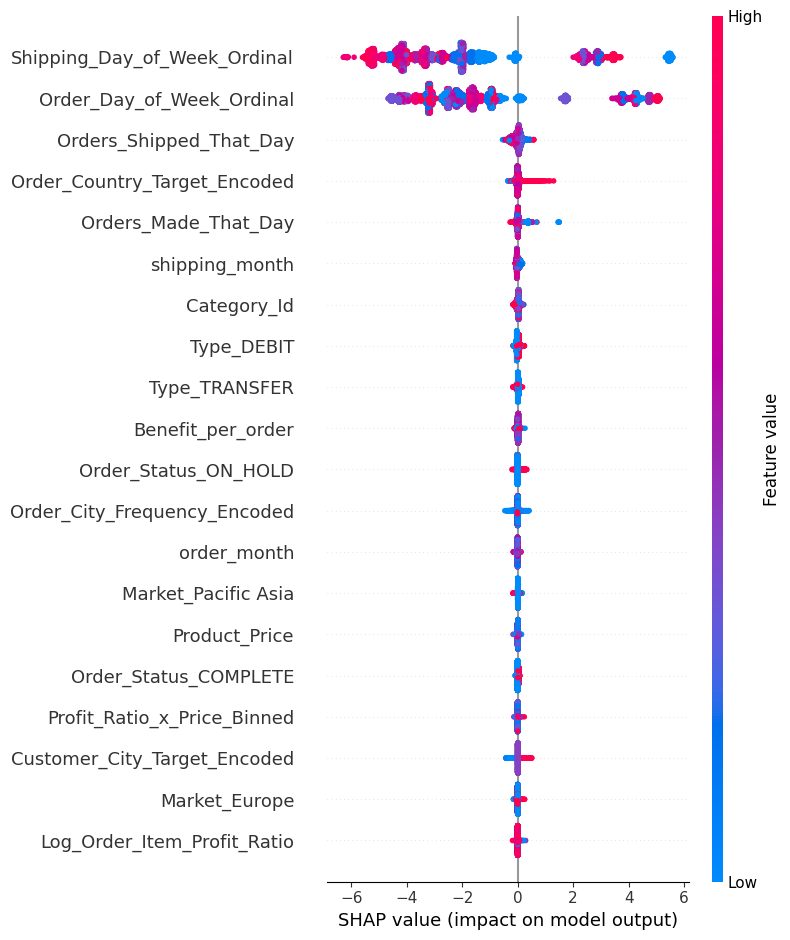

In [70]:
# Plot SHAP summary for each class in a multiclass model
for i in range(shap_values.shape[2]):
    # Extract SHAP values for class i
    class_shap_values = shap_values[:, :, i]  
    
    # Create a figure for better visualization, setting size for clarity
    plt.figure(figsize=(10, 6))
    
    # Plot the SHAP summary for the current class with a title indicating the class number
    shap.summary_plot(class_shap_values, X_test, title=f"SHAP Summary Plot for Class {i}")
    
    # Display the plot
    plt.show()
